In [99]:
import pandas as pd
import numpy as np
data = pd.read_csv('creditcard.csv')

In [100]:
data['Time']= data['Time'].astype('int64')

In [101]:
data.isnull().any()

Time      False
V1        False
V2        False
V3        False
V4        False
V5        False
V6        False
V7        False
V8        False
V9        False
V10       False
V11       False
V12       False
V13       False
V14       False
V15       False
V16       False
V17       False
V18       False
V19       False
V20       False
V21       False
V22       False
V23        True
V24        True
V25        True
V26        True
V27        True
V28        True
Amount     True
Class      True
dtype: bool

In [102]:
data.fillna(0,inplace=True)

In [103]:
data['Class'] = data['Class'].astype('int64')

In [104]:
import seaborn as sns
import matplotlib.pyplot as plt

In [105]:
def outliers(str,column):
  plt.figure(figsize=(10,8))
  sns.boxplot(y=data[column])
  plt.title(f'Boxplot of {column} {str}')
  plt.show()

Before Outlier


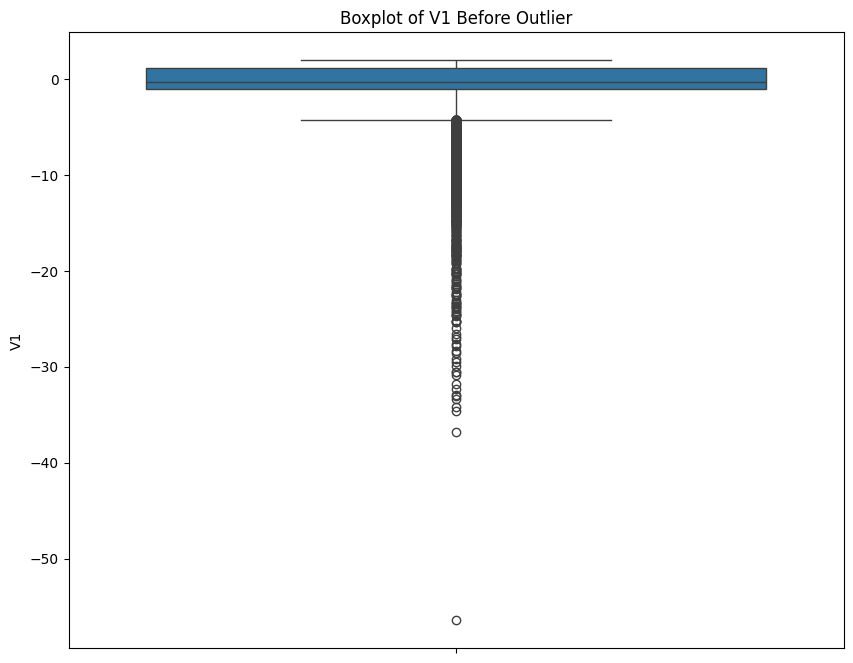

After Outlier


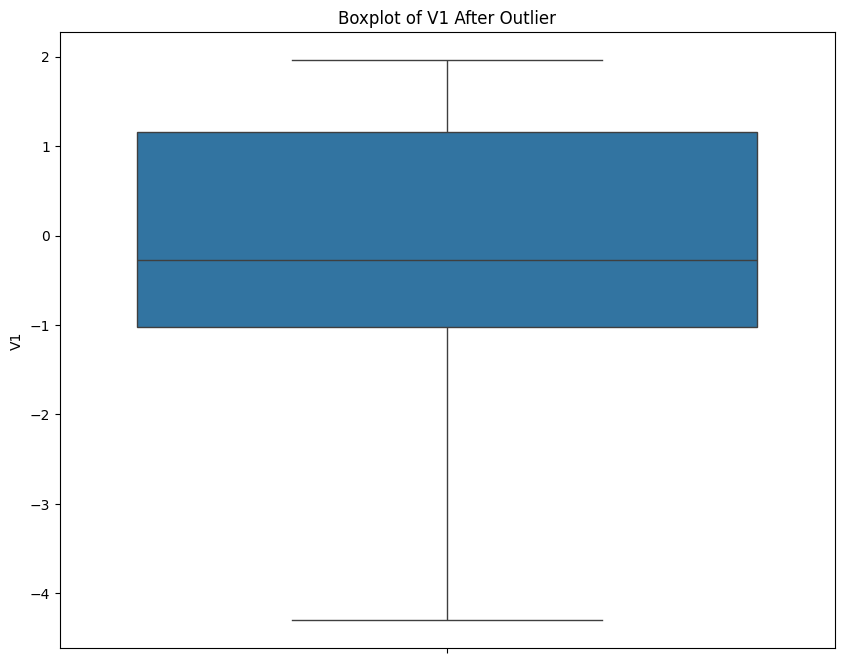

Before Outlier


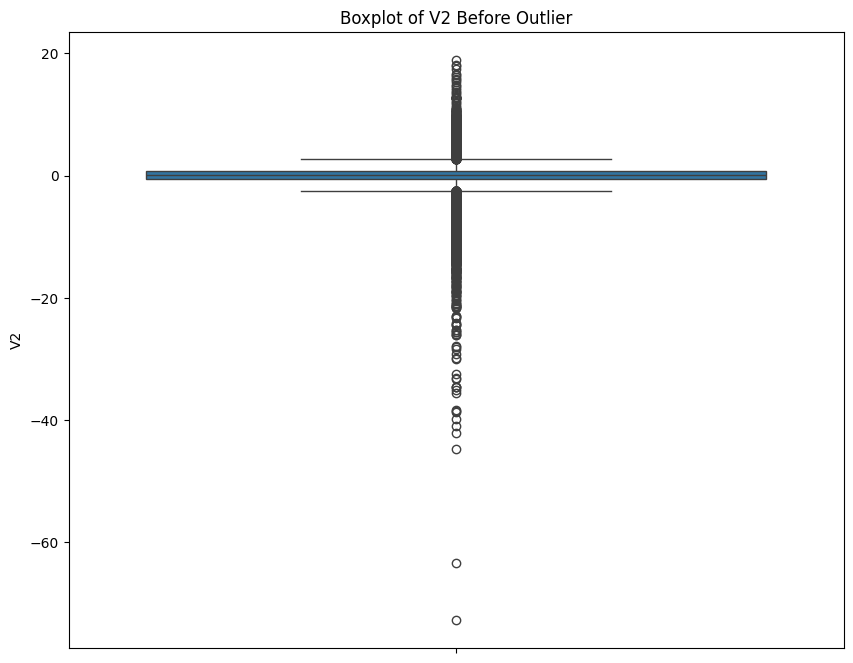

After Outlier


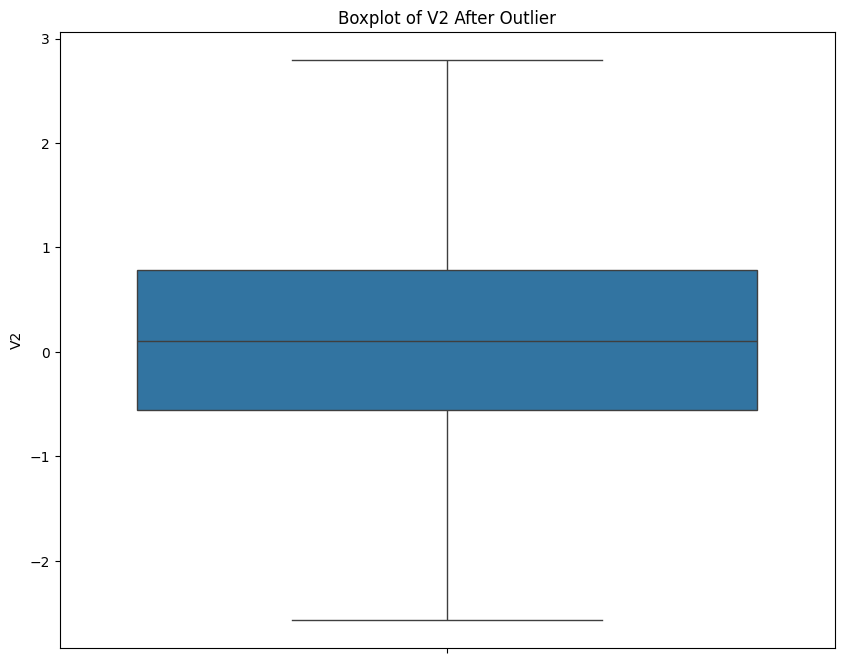

Before Outlier


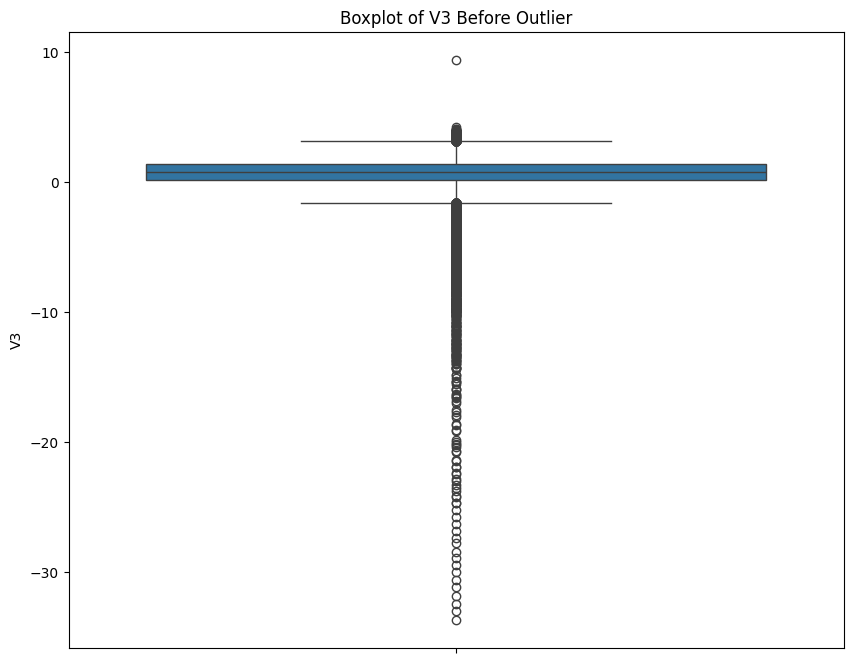

After Outlier


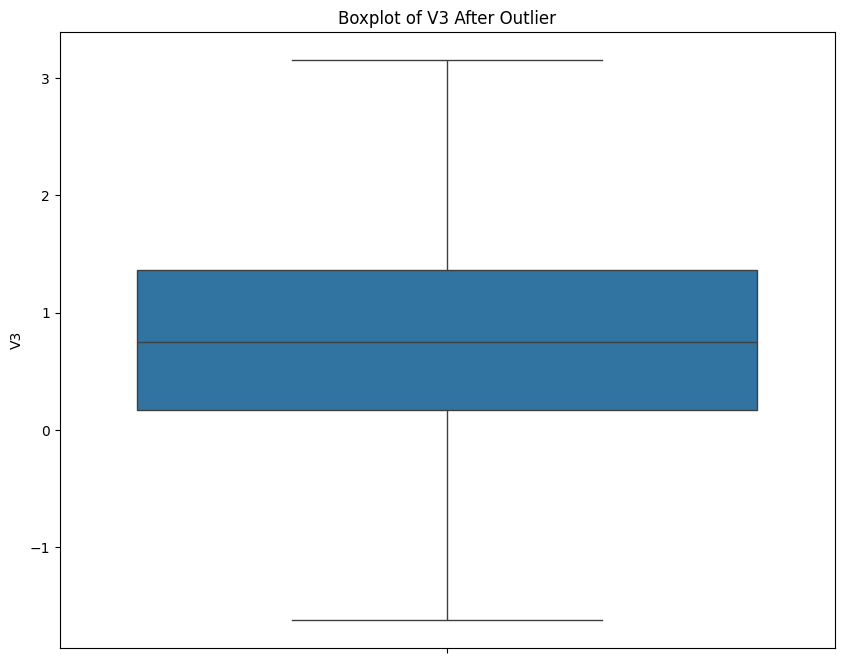

Before Outlier


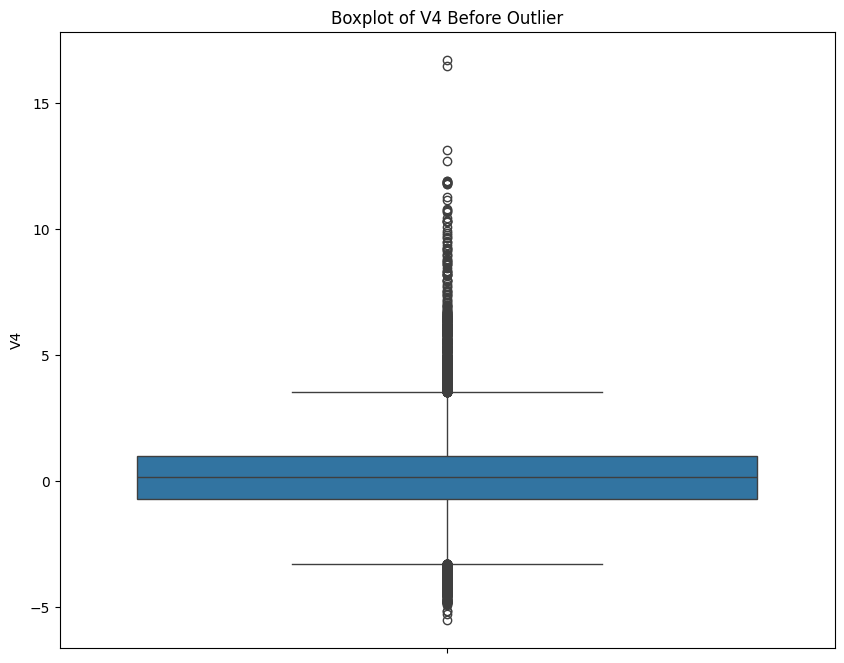

After Outlier


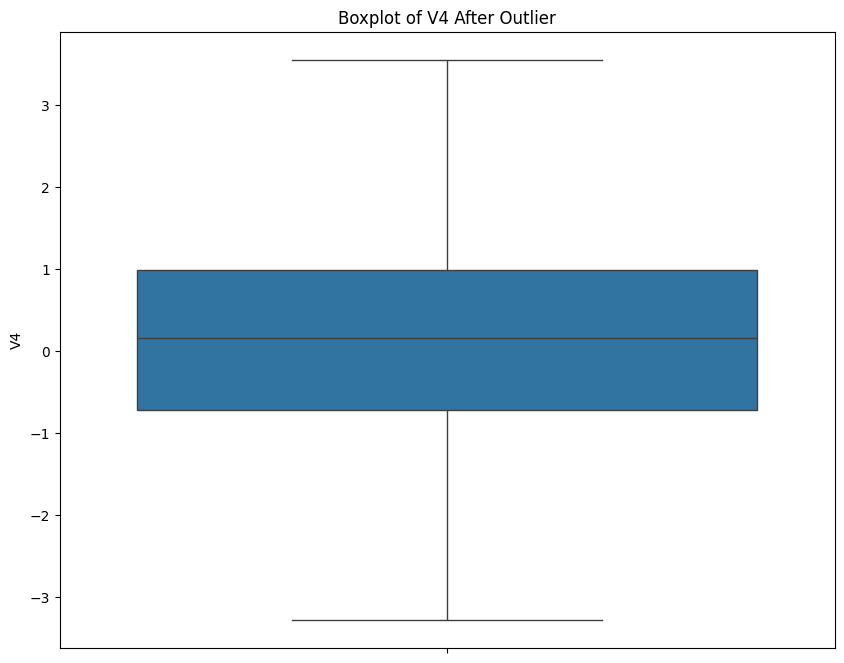

Before Outlier


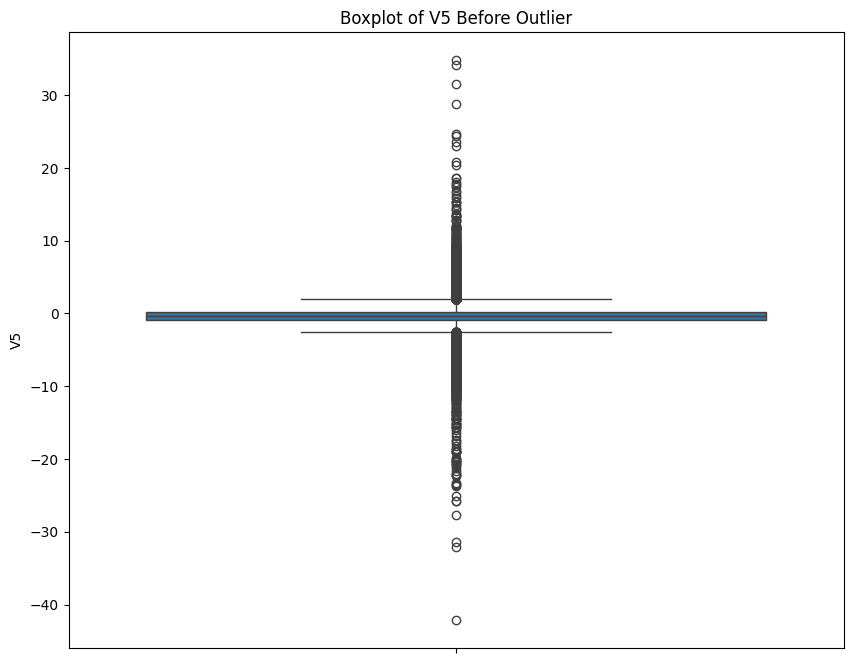

After Outlier


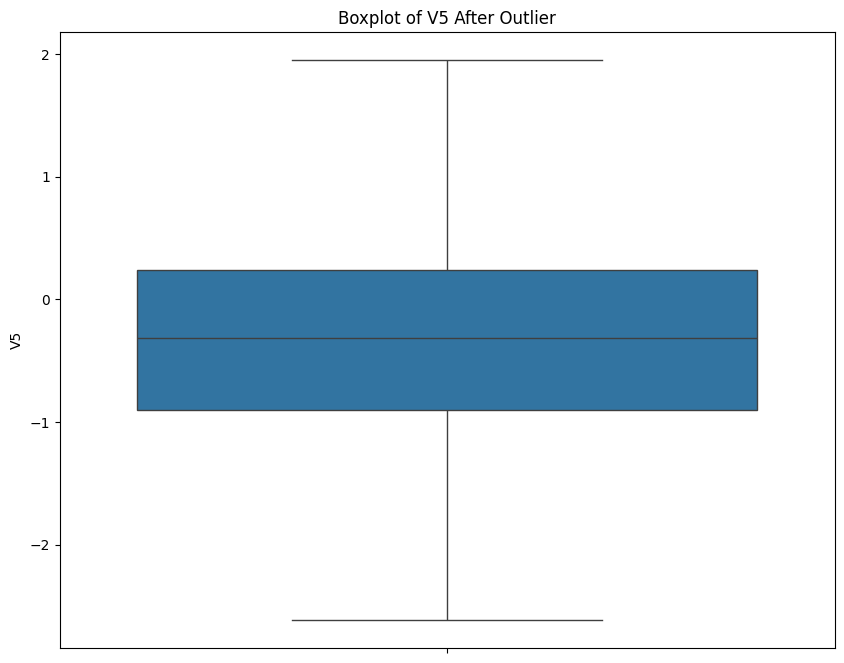

Before Outlier


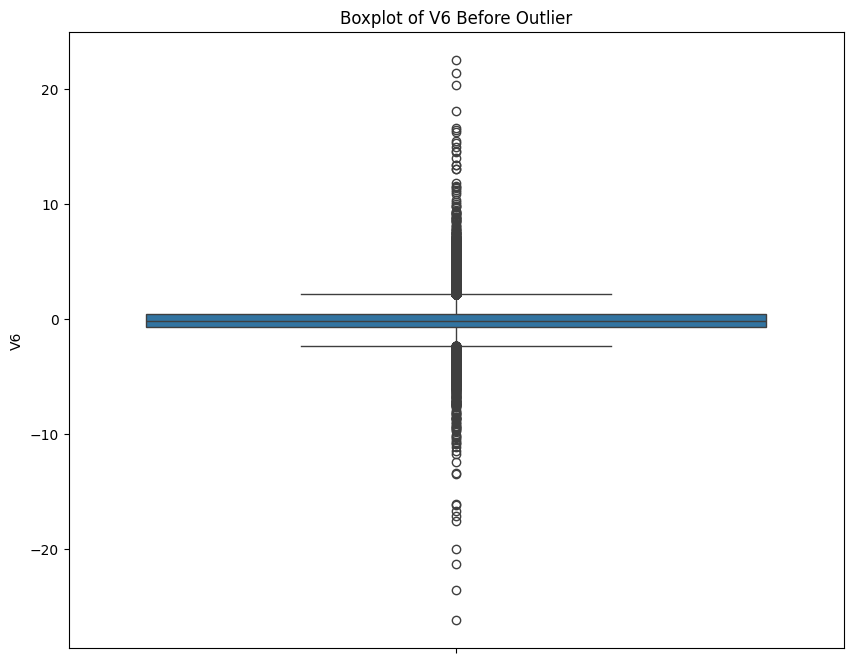

After Outlier


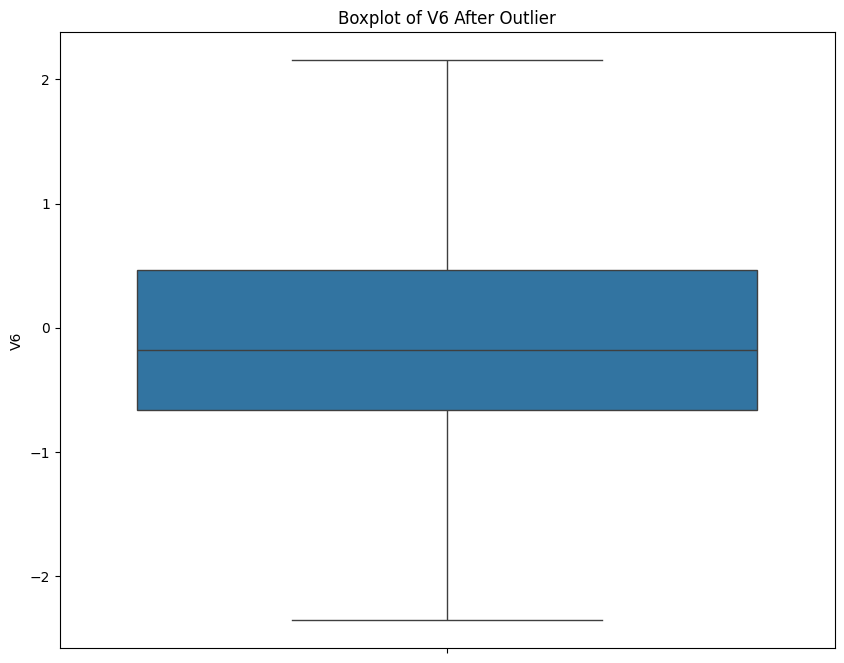

Before Outlier


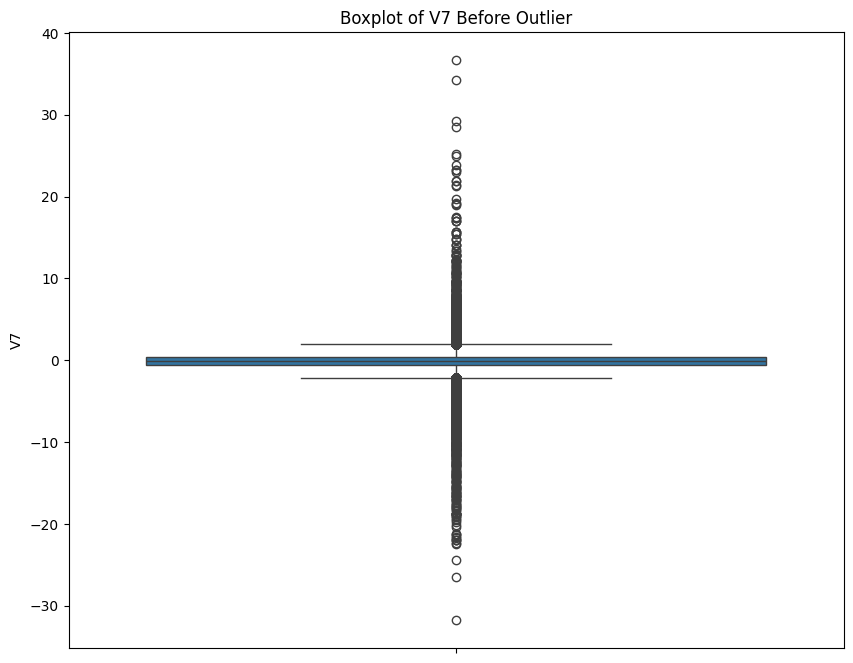

After Outlier


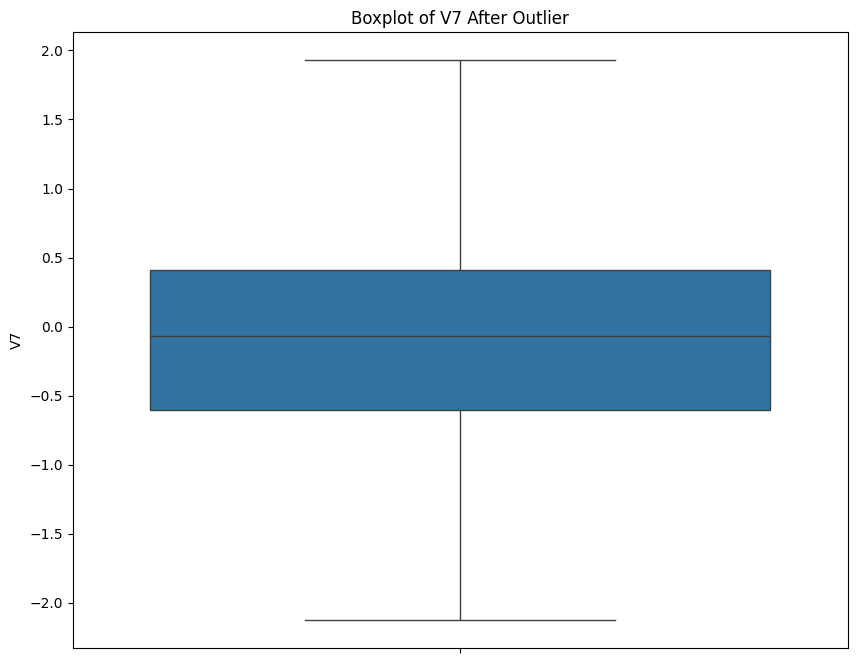

Before Outlier


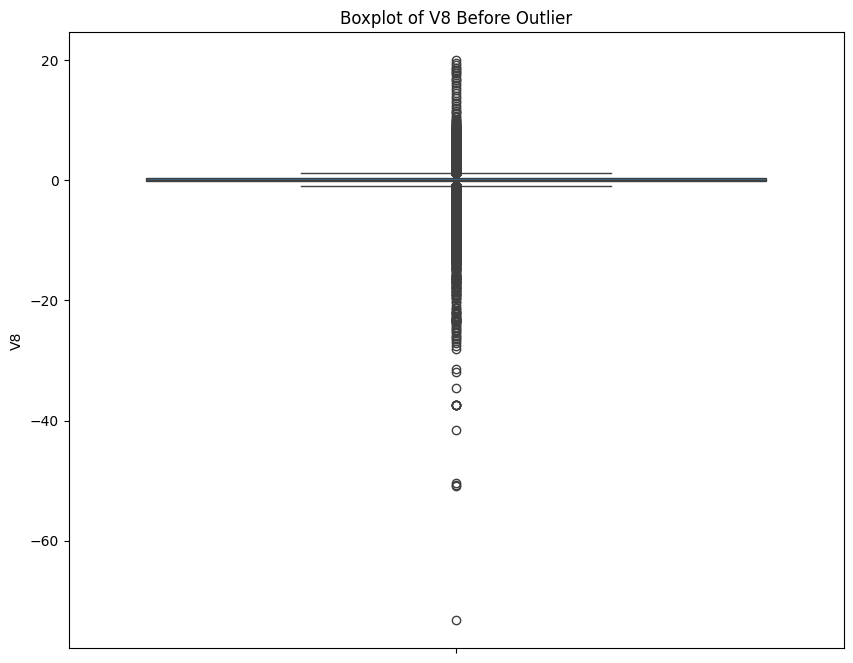

After Outlier


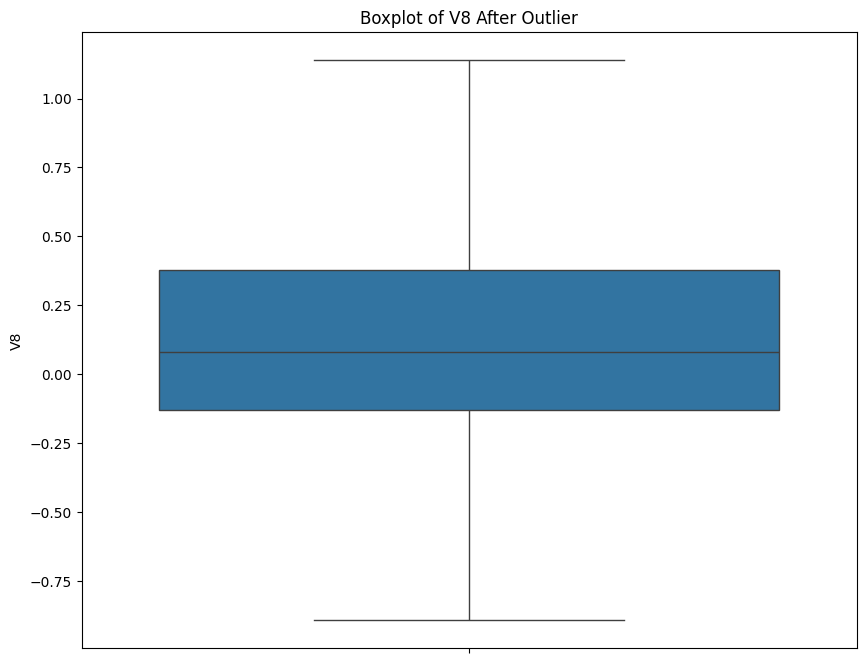

Before Outlier


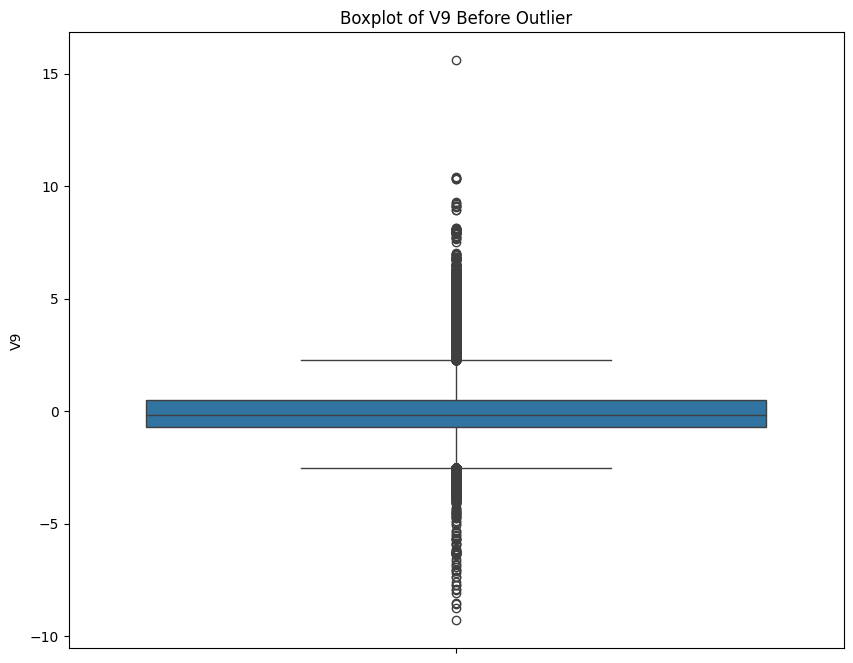

After Outlier


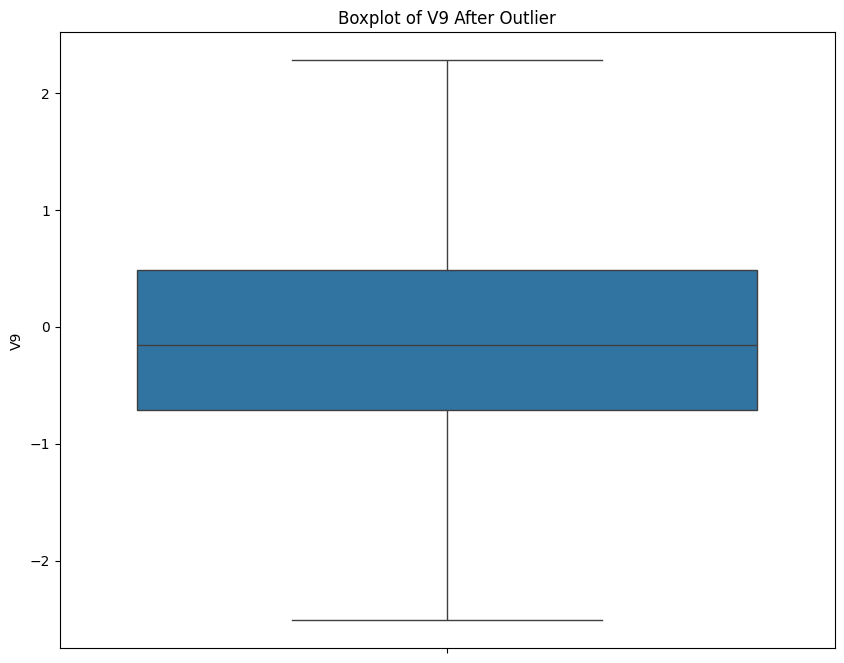

Before Outlier


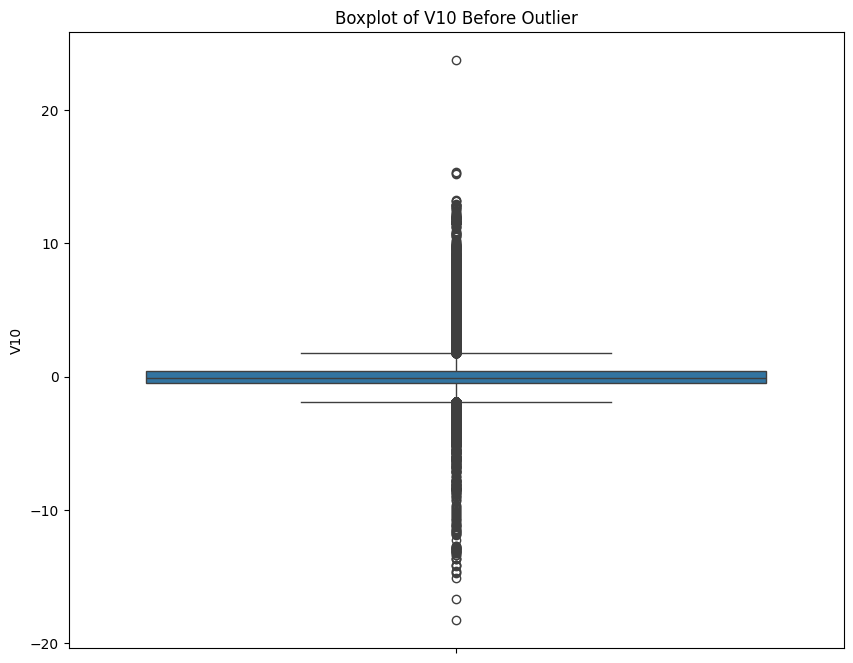

After Outlier


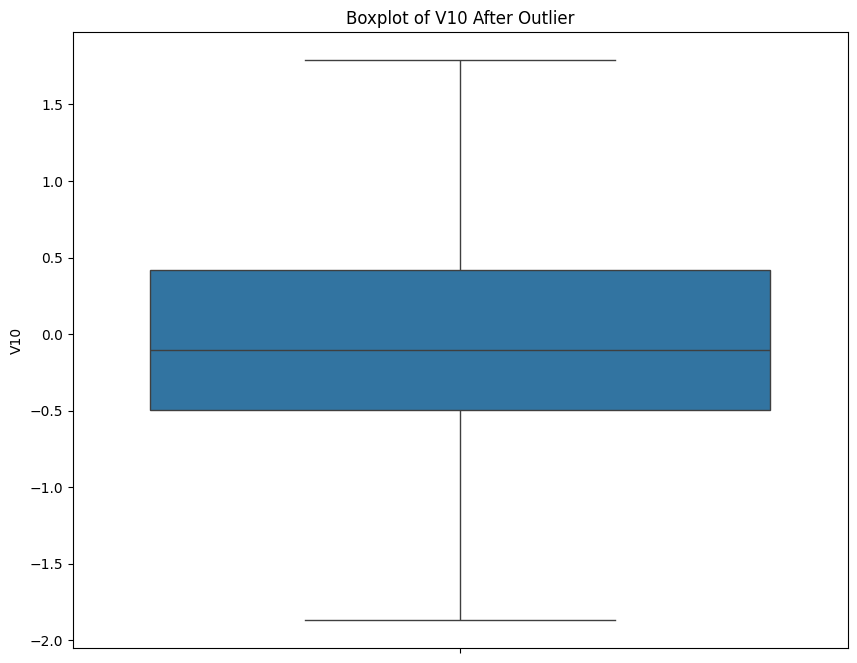

Before Outlier


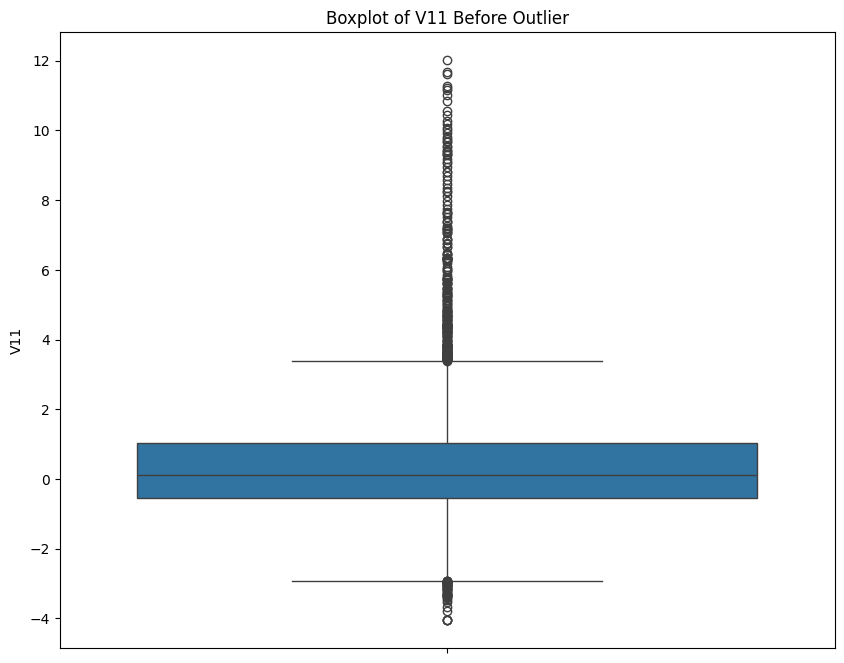

After Outlier


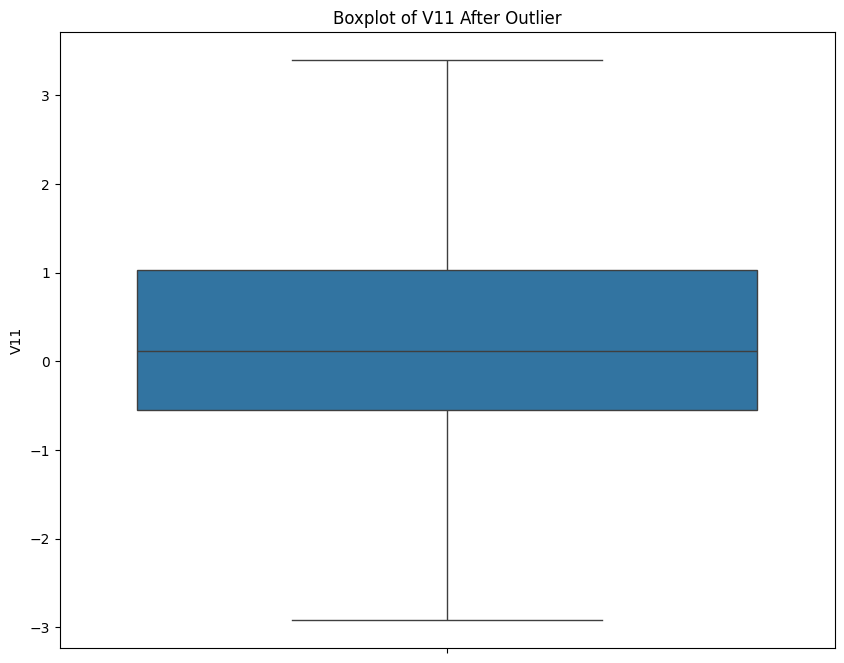

Before Outlier


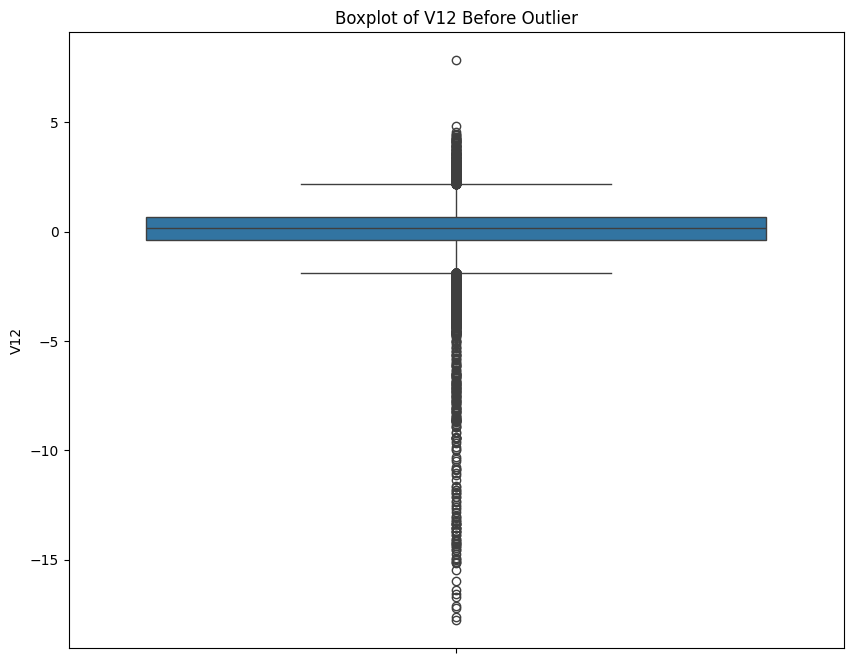

After Outlier


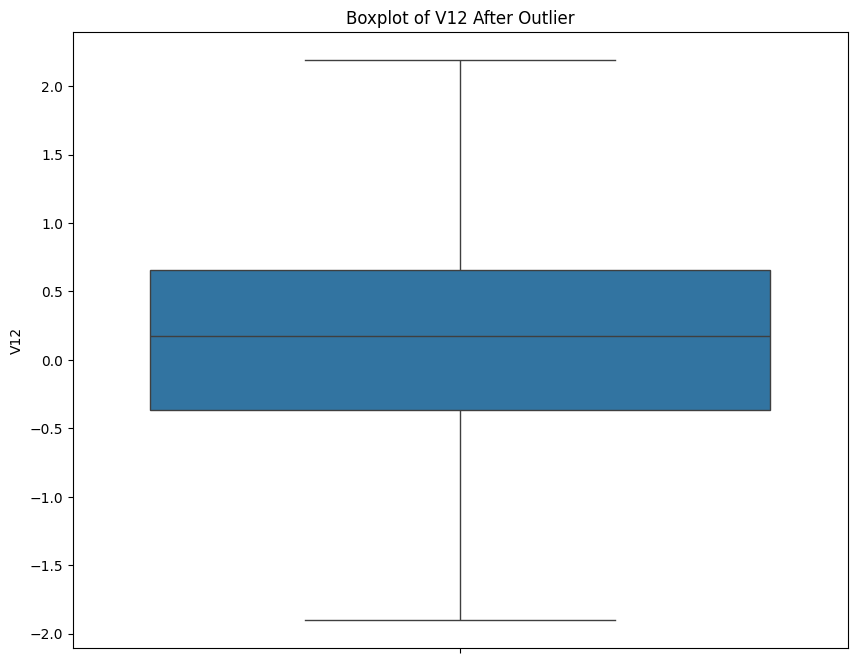

Before Outlier


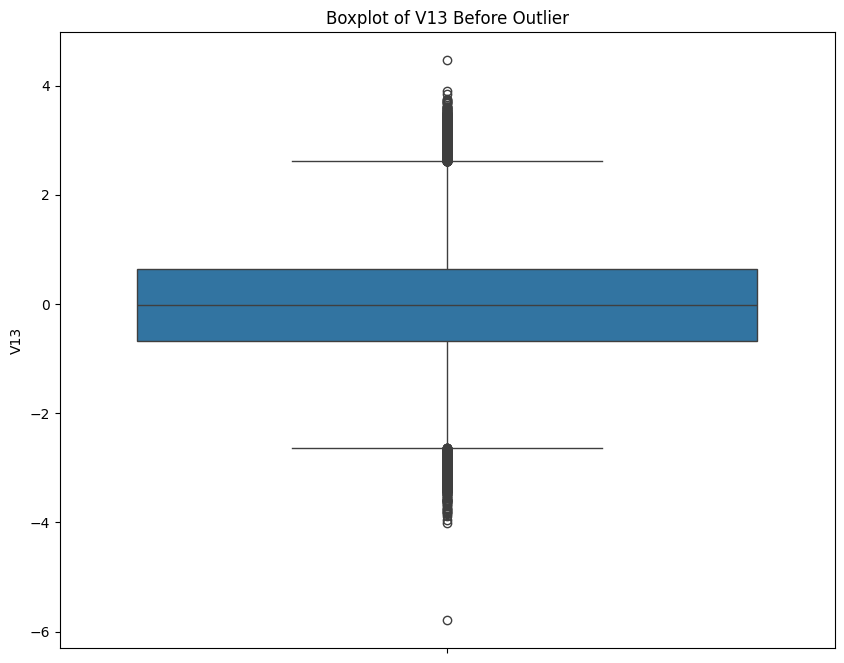

After Outlier


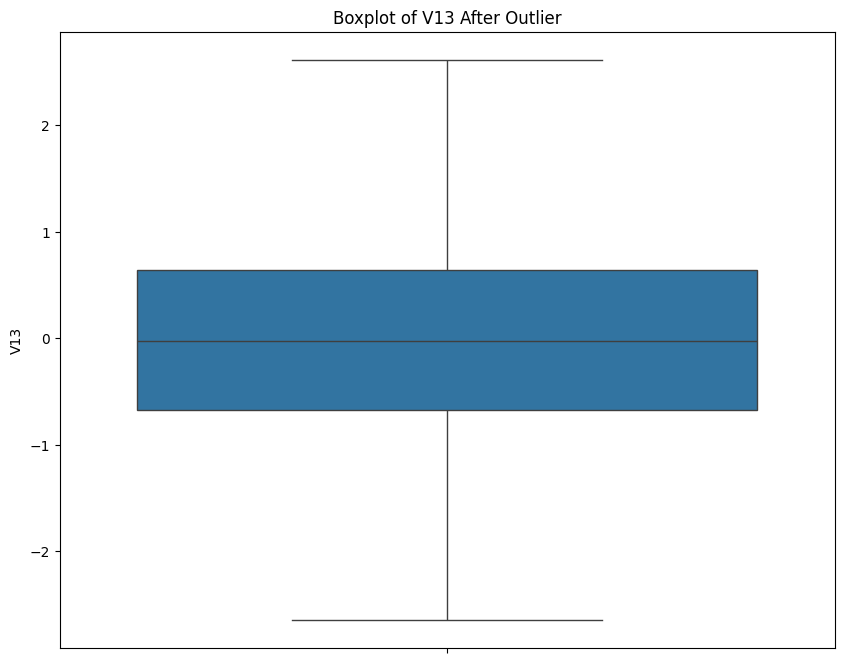

Before Outlier


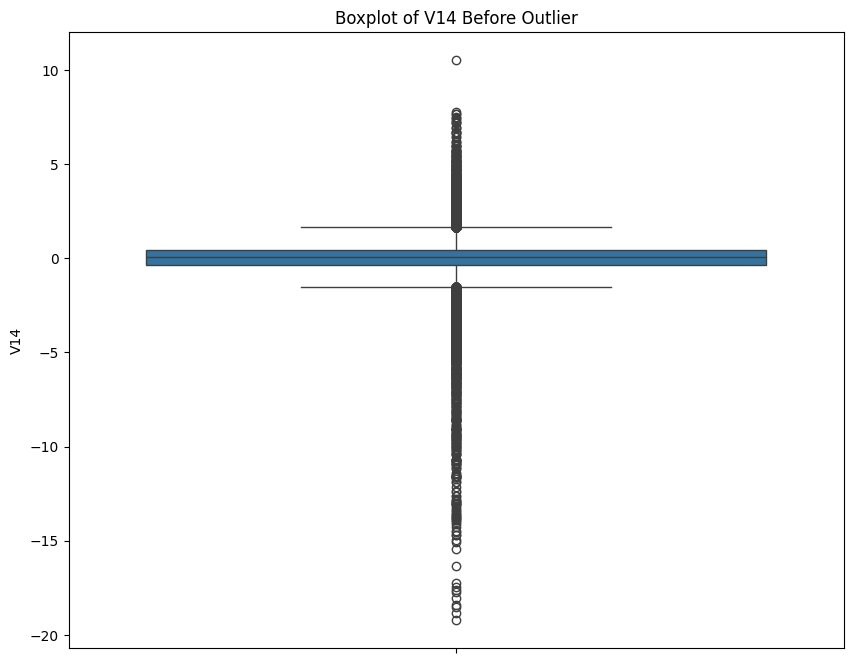

After Outlier


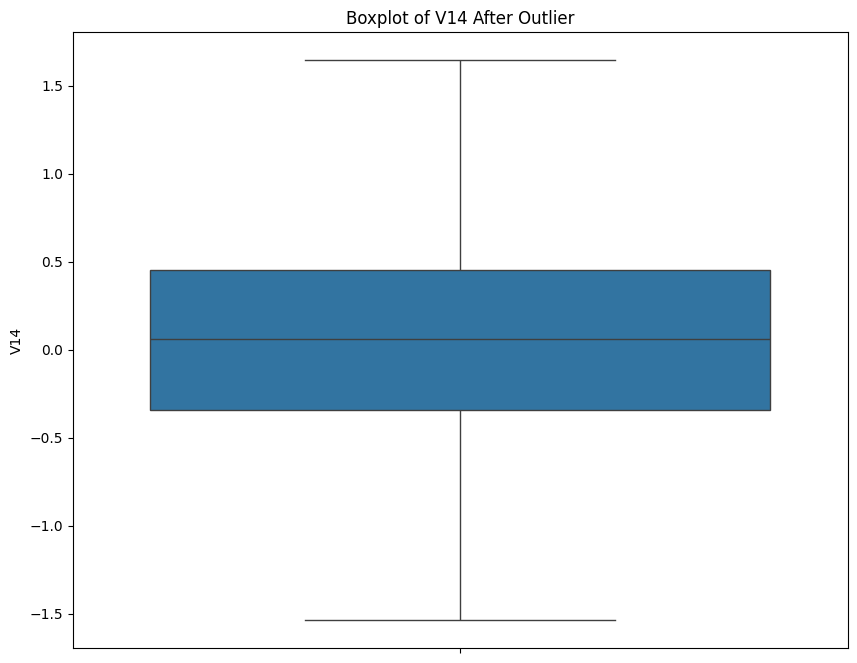

Before Outlier


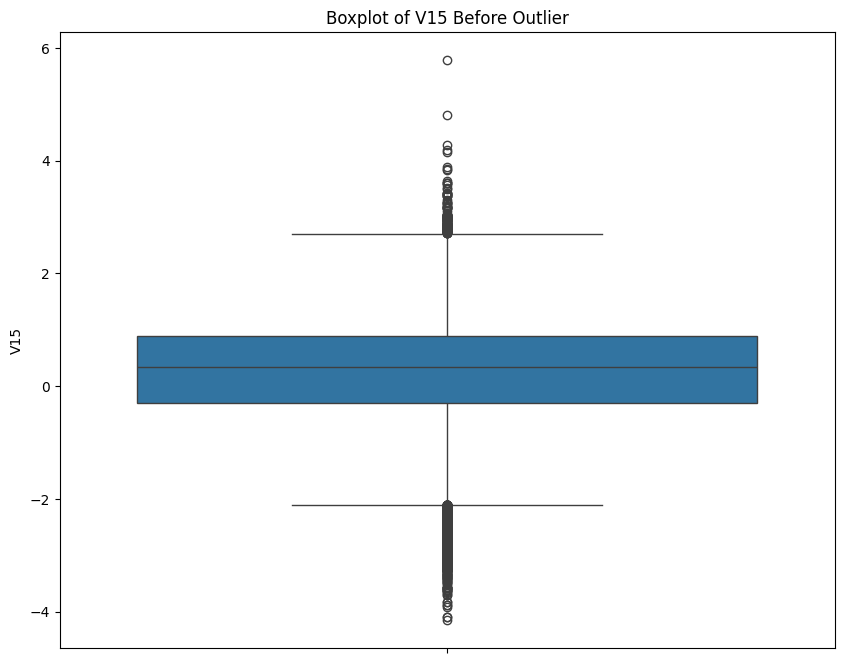

After Outlier


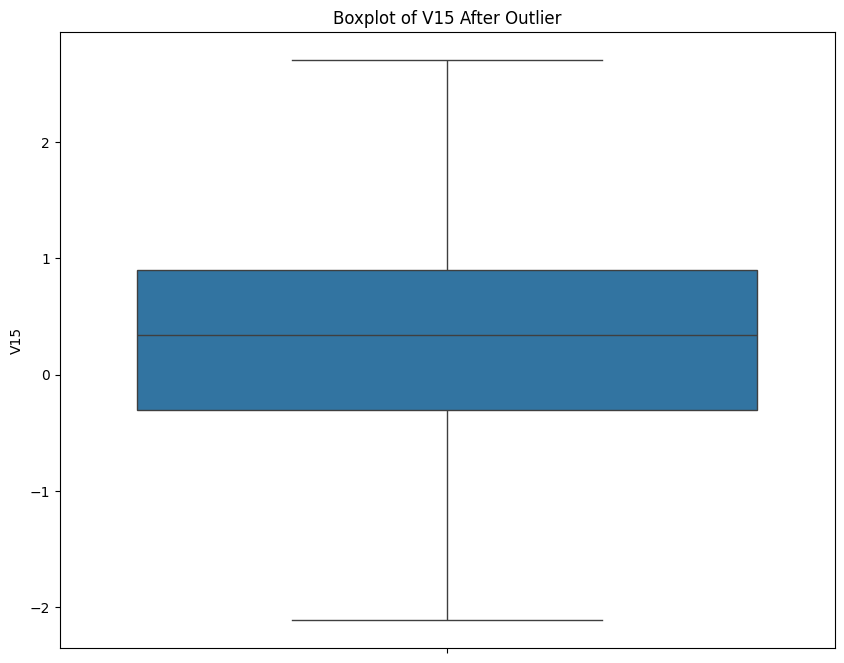

Before Outlier


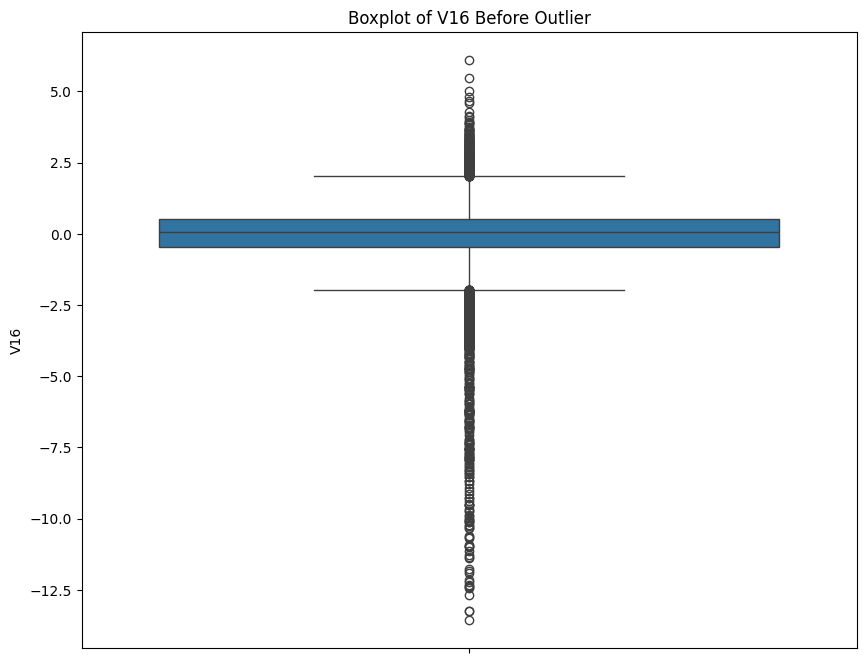

After Outlier


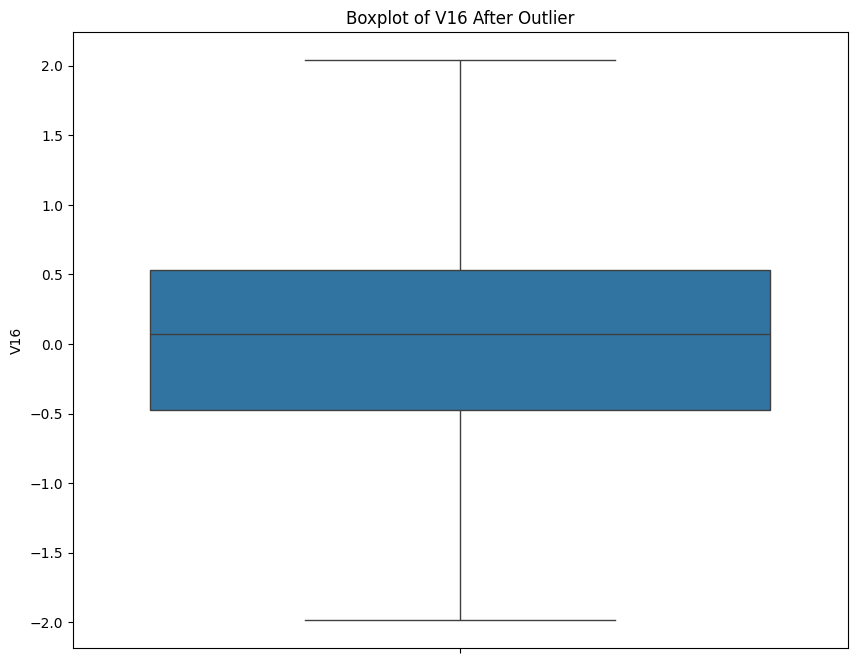

Before Outlier


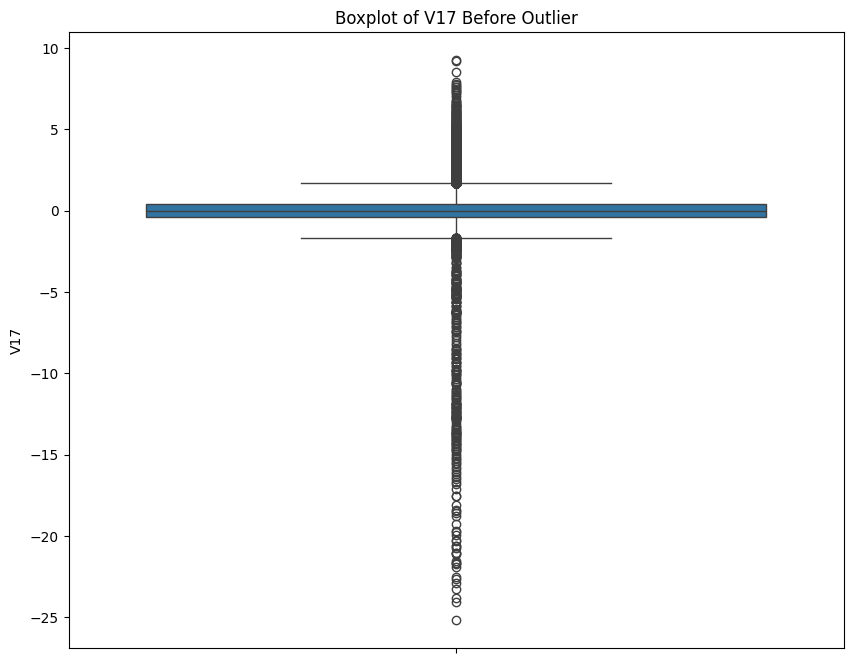

After Outlier


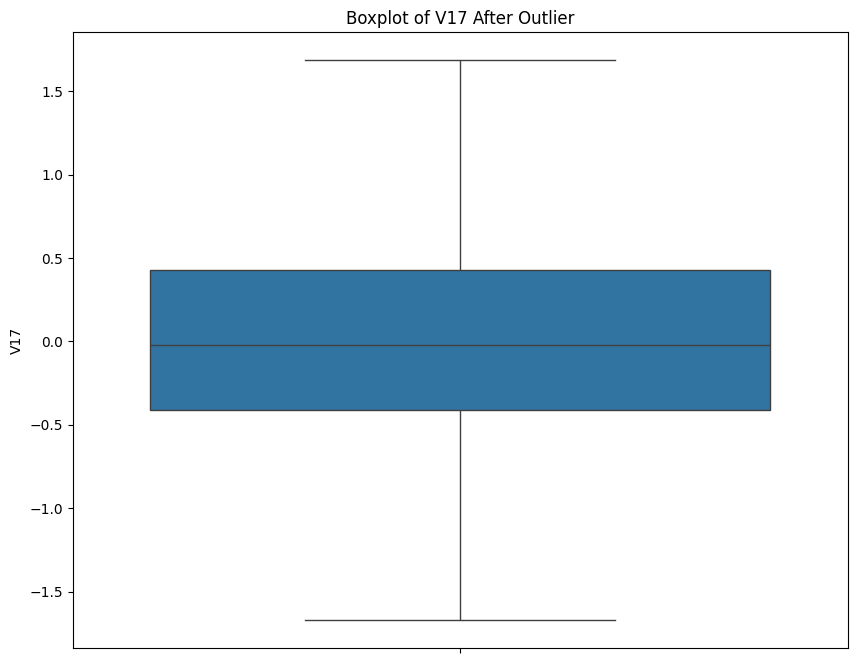

Before Outlier


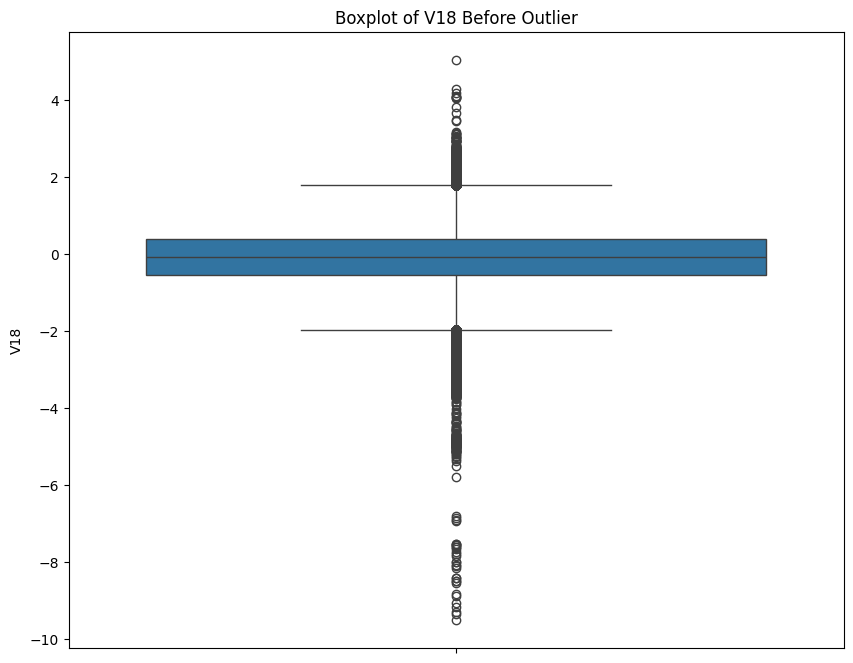

After Outlier


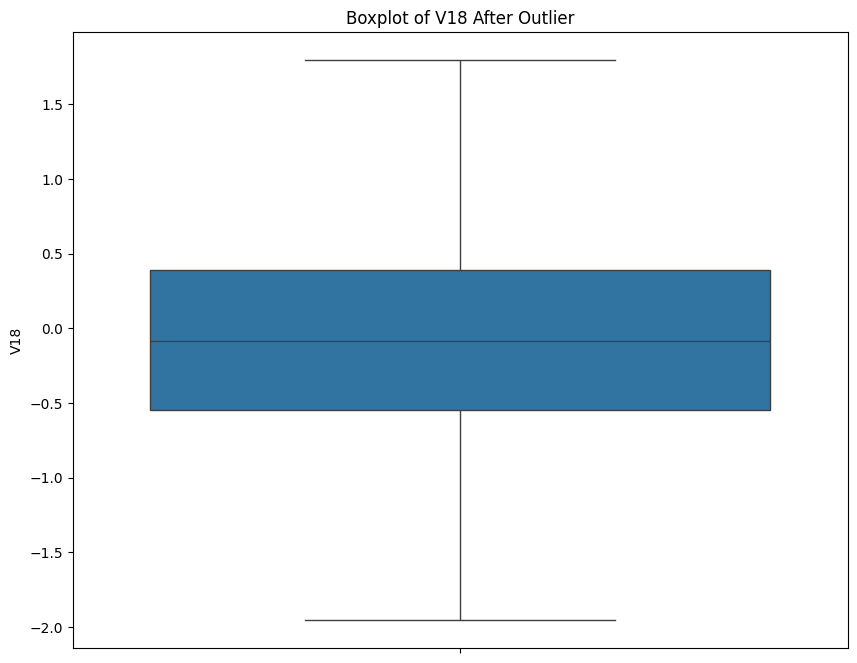

Before Outlier


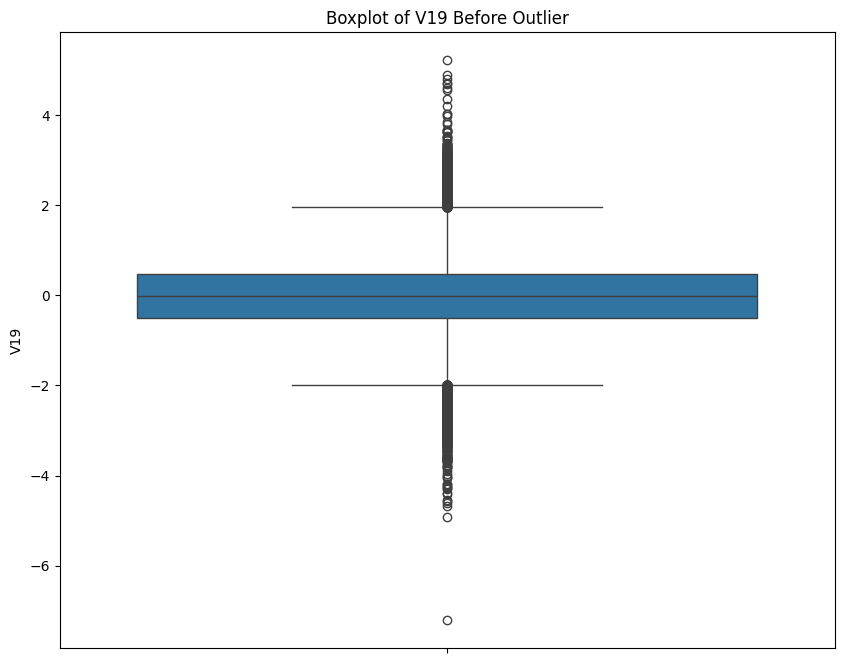

After Outlier


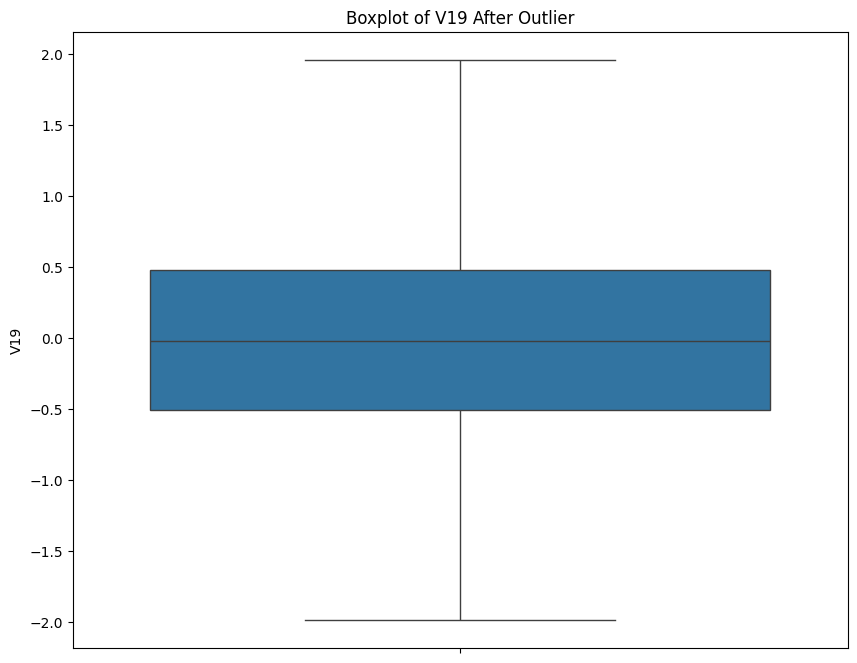

Before Outlier


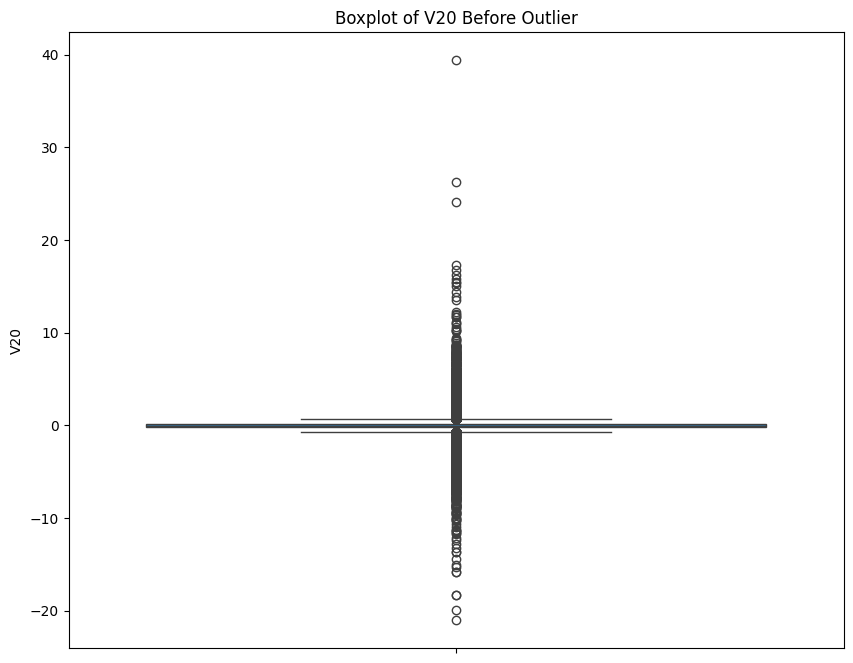

After Outlier


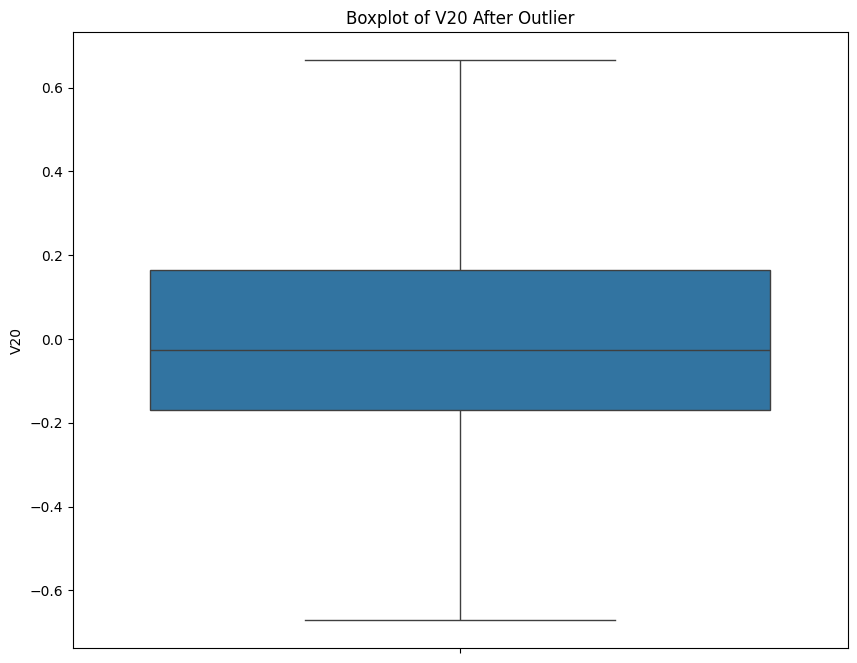

Before Outlier


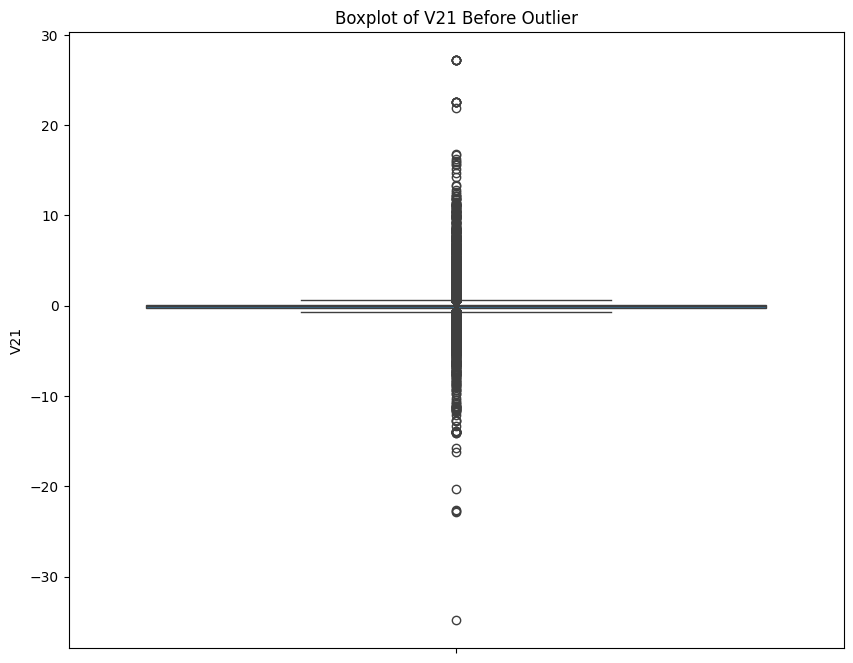

After Outlier


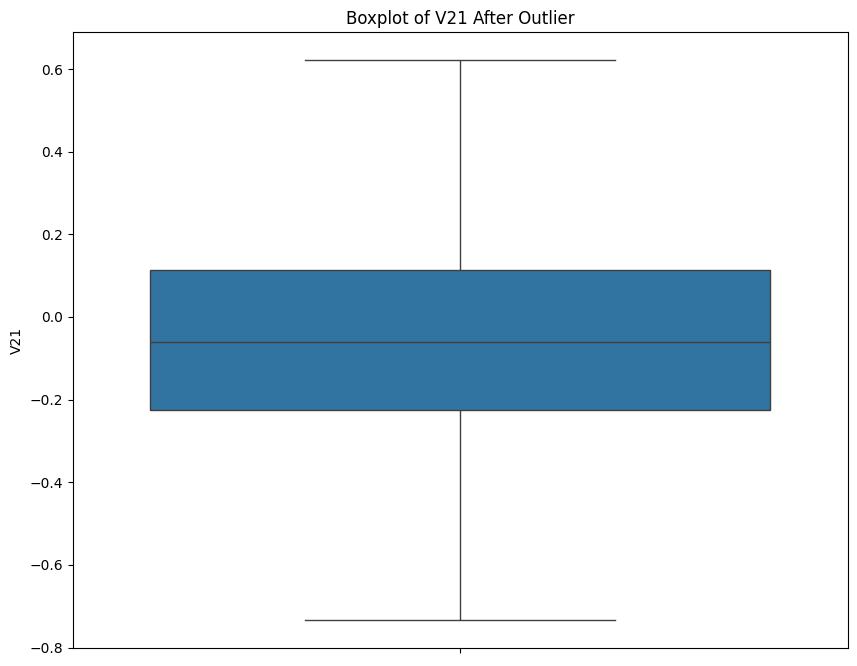

Before Outlier


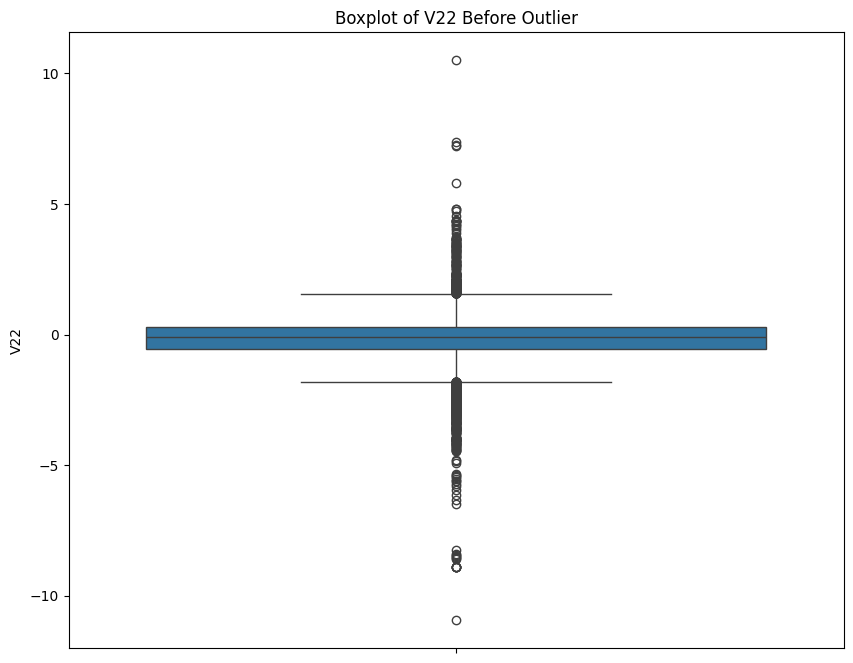

After Outlier


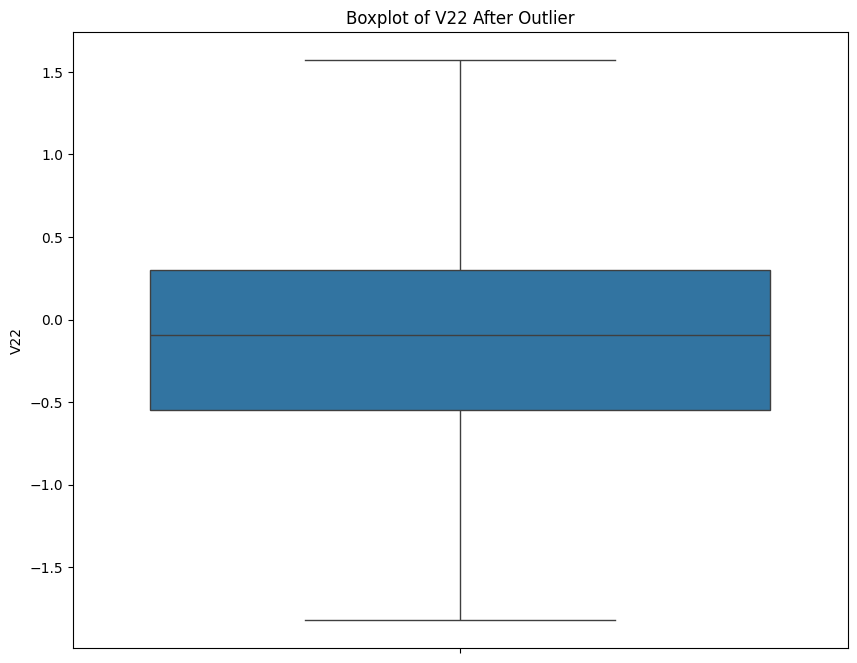

Before Outlier


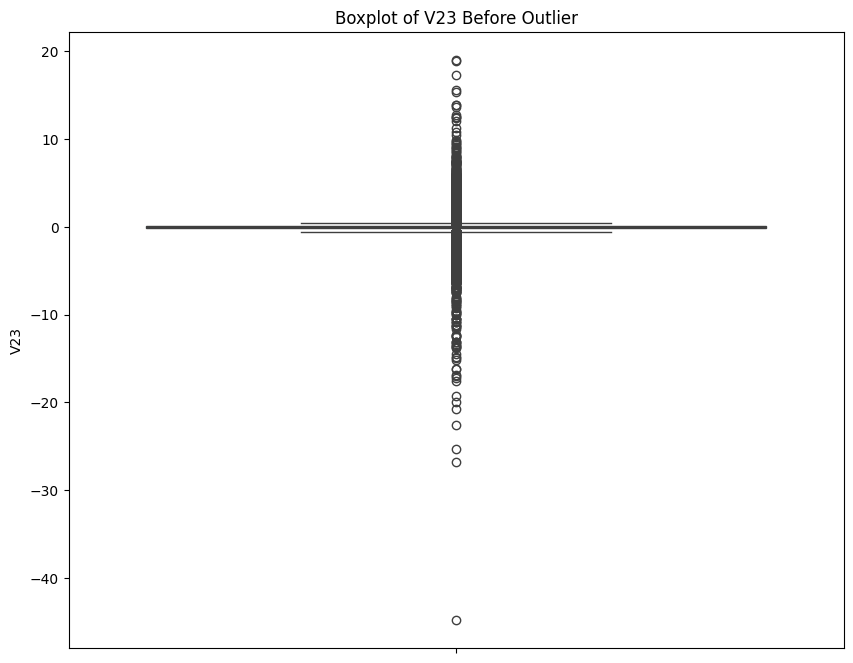

After Outlier


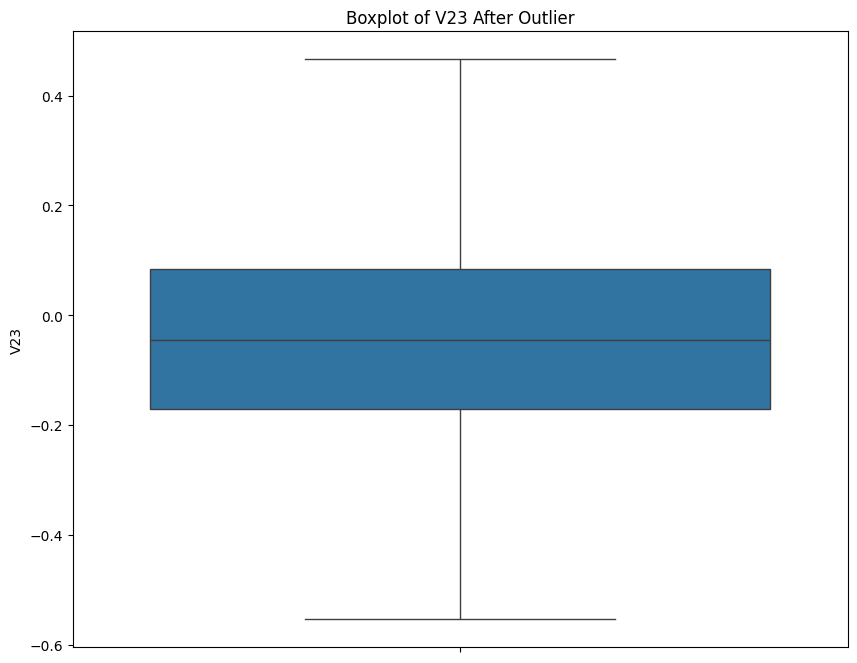

Before Outlier


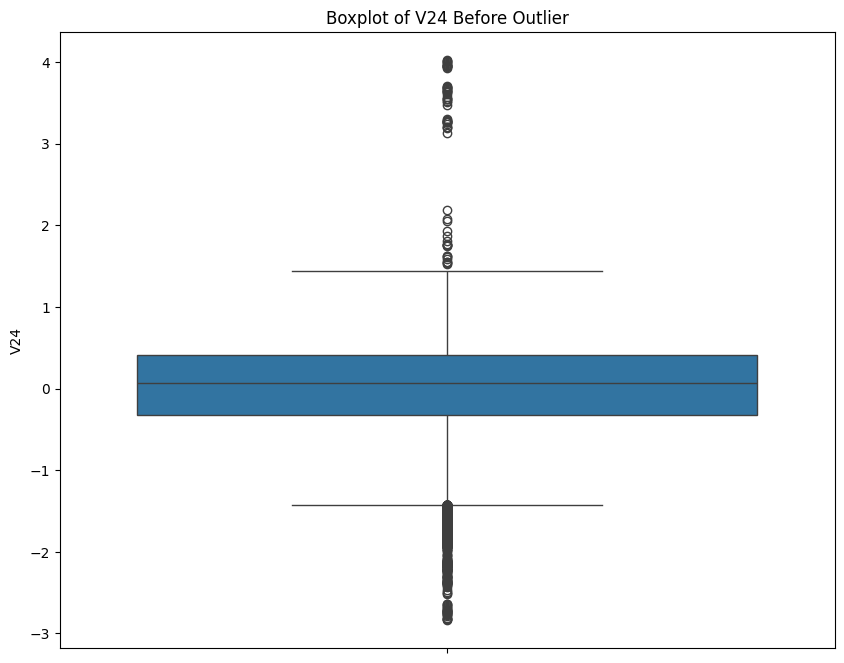

After Outlier


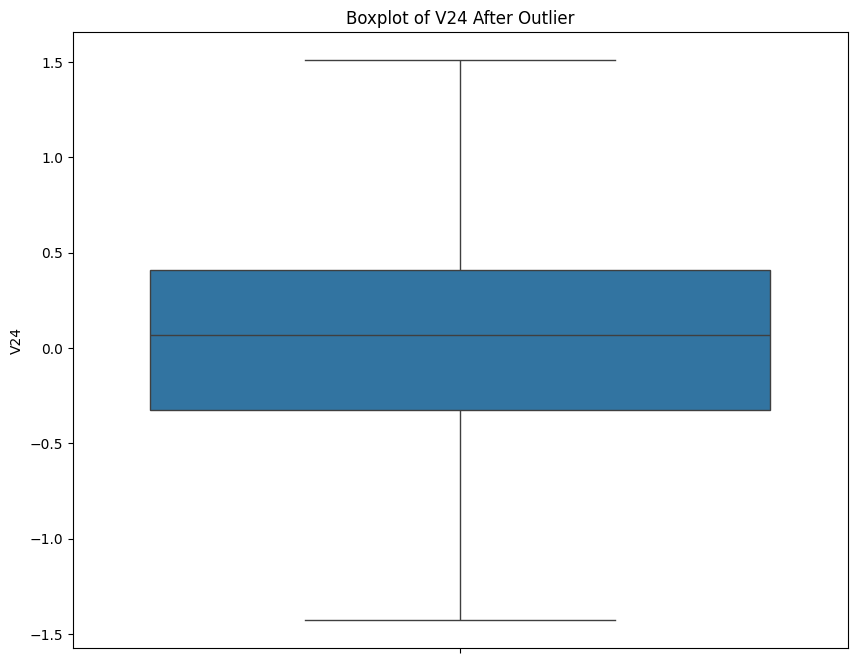

Before Outlier


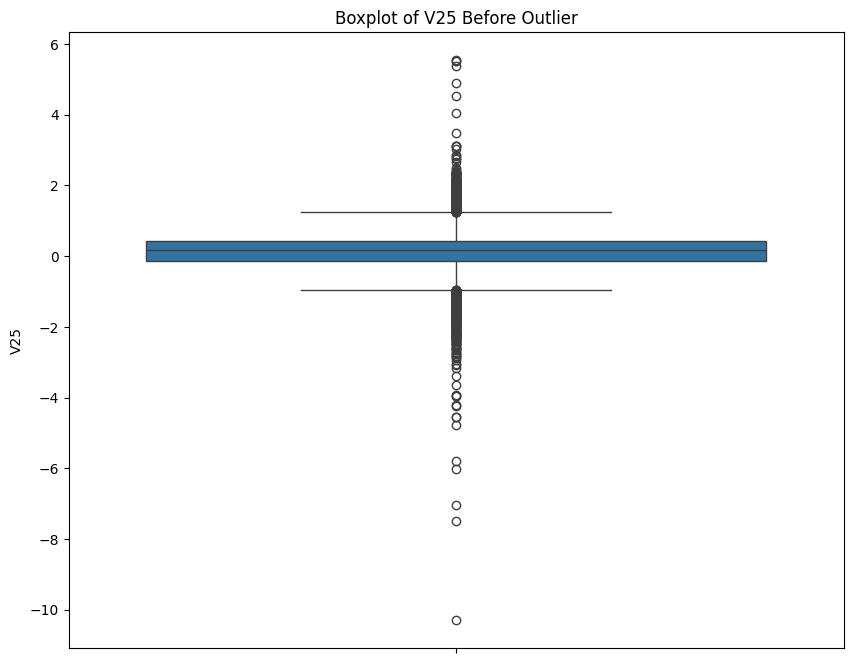

After Outlier


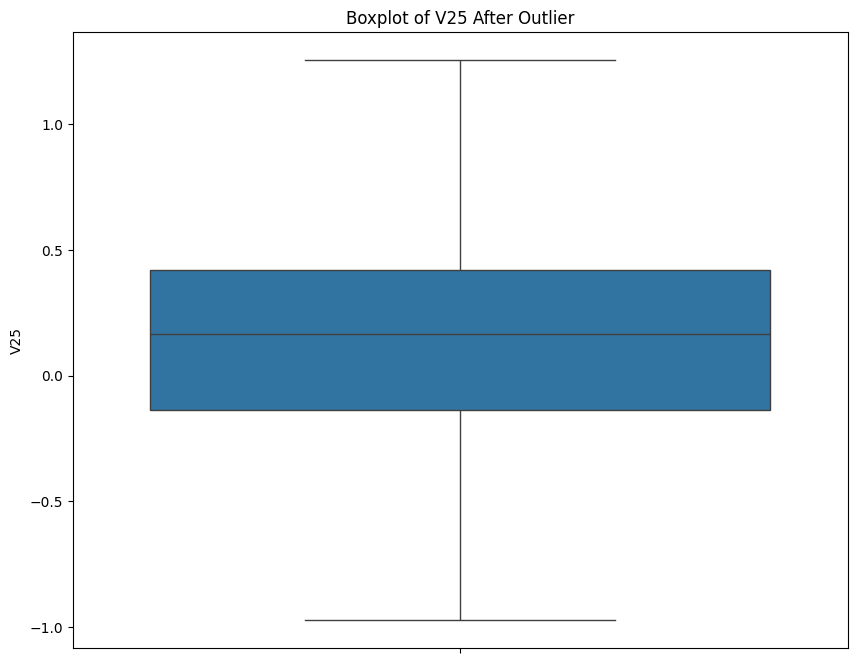

Before Outlier


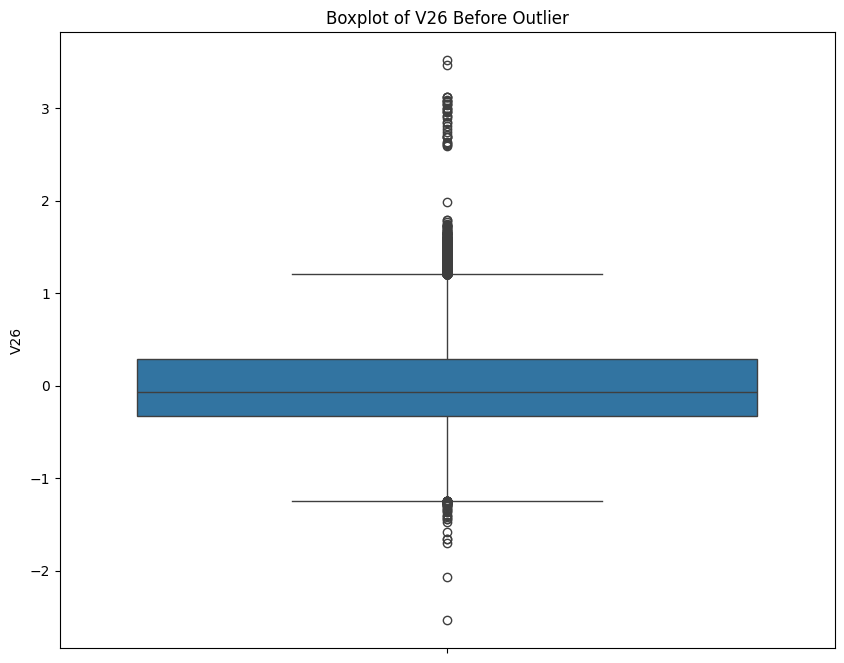

After Outlier


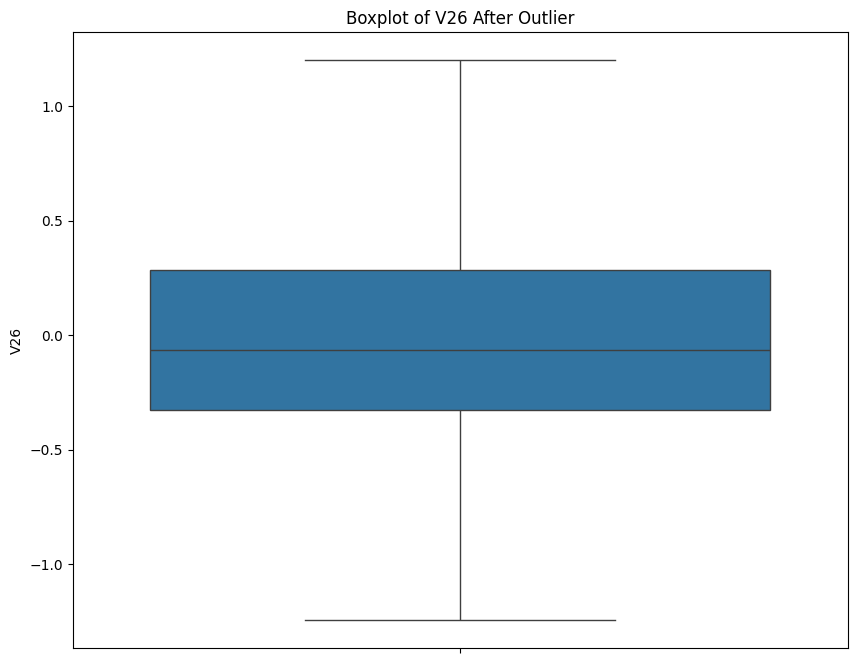

Before Outlier


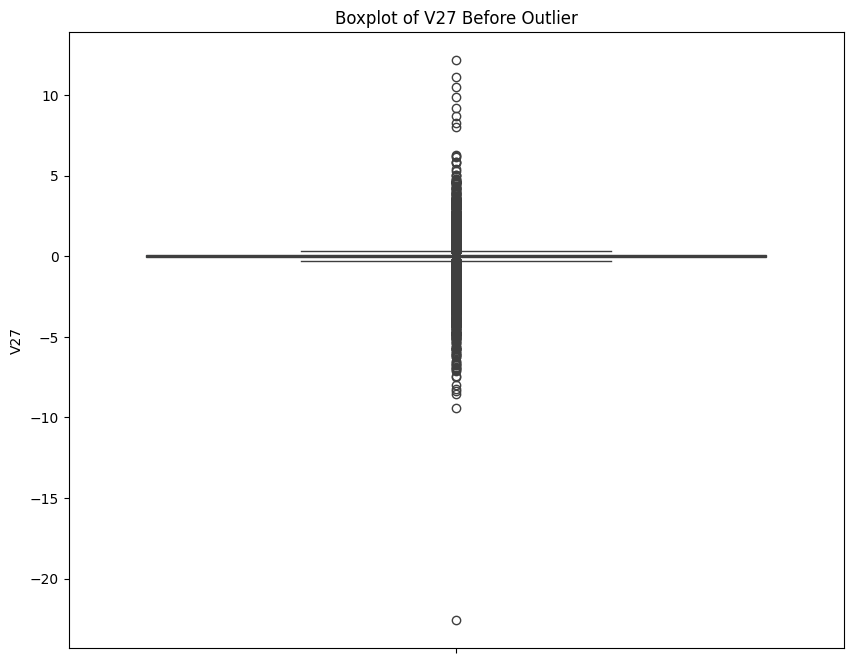

After Outlier


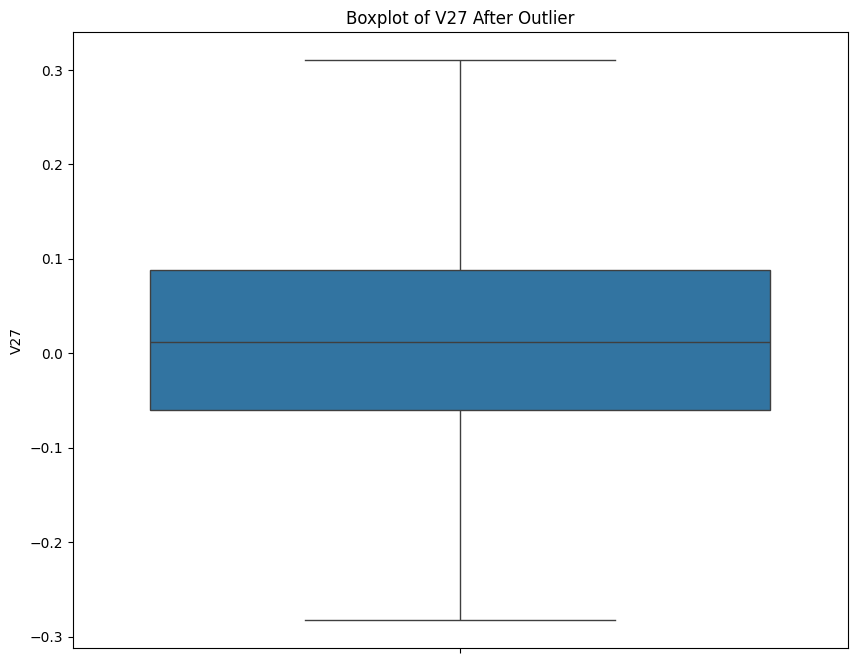

Before Outlier


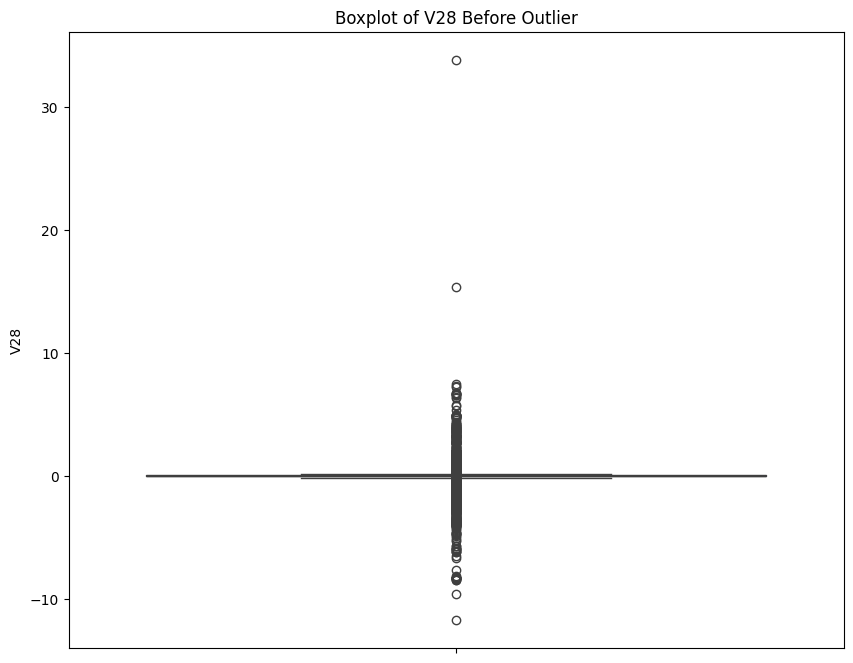

After Outlier


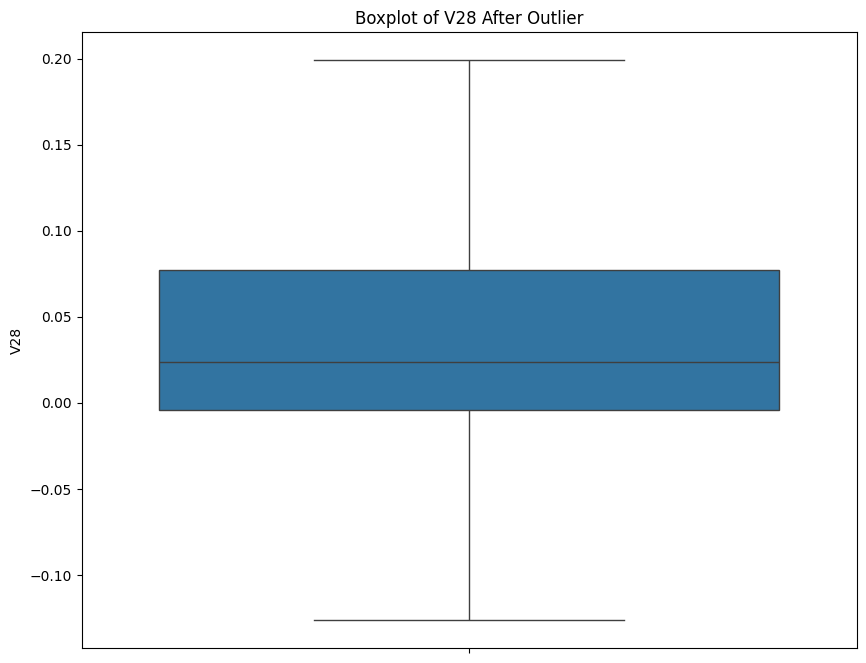

Before Outlier


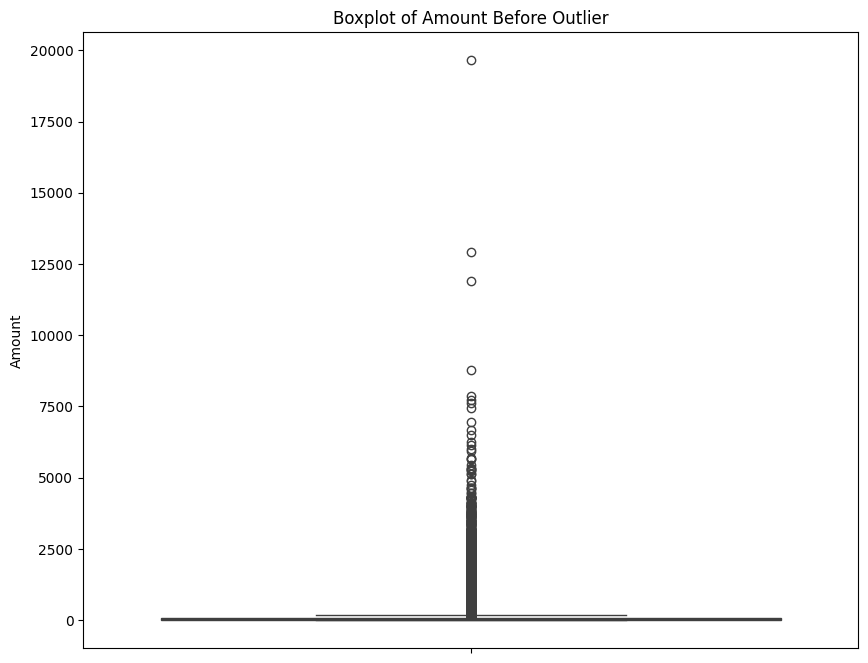

After Outlier


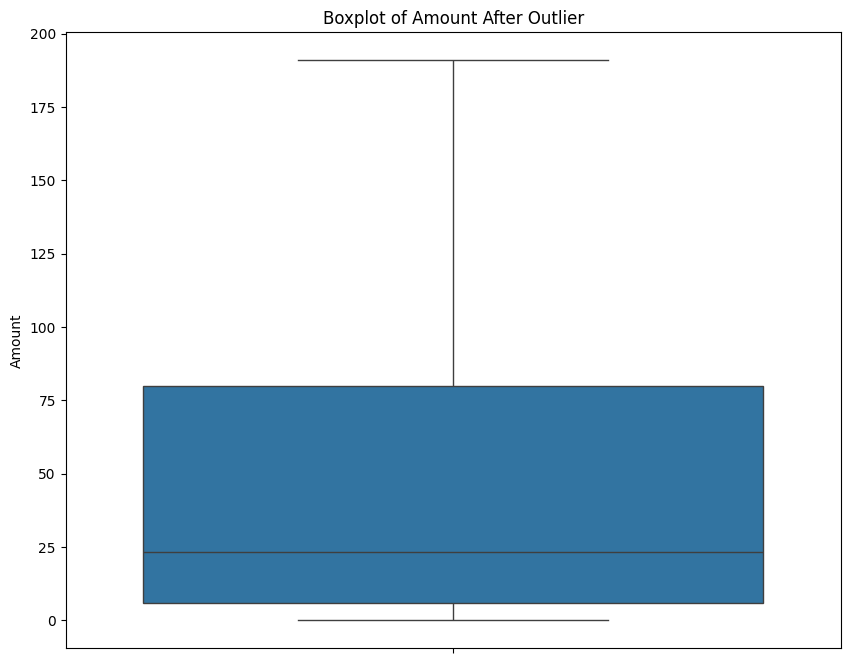

In [106]:
for column in data:

  if ((data[column].dtype == 'float64' or data[column].dtype == 'innt64') and column!='Class'):

    print(f"Before Outlier")
    outliers('Before Outlier',column)

    q1 = data[column].quantile(0.25)
    q3 = data[column].quantile(0.75)
    iqr = q3 - q1

    upper_limit = q3 + 1.5 * iqr
    lower_limit = q1 - 1.5 * iqr

    data.loc[data[column] > upper_limit, column] = upper_limit
    data.loc[data[column] < lower_limit, column] = lower_limit

    print(f"After Outlier")
    outliers('After Outlier',column)

In [107]:
data['Class'].value_counts()

Class
0    144387
1       280
Name: count, dtype: int64

In [108]:
legit = data[data.Class == 0]
fraud = data[data.Class == 1]

In [109]:
print(legit.shape)
print(fraud.shape)

(144387, 31)
(280, 31)


In [110]:
data.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,52935.839501,-0.173476,0.068890,0.733228,0.125617,-0.284615,-0.00762,-0.100198,0.133124,-0.105245,...,0.007171,-0.051040,-0.115876,-0.042081,0.015504,0.133575,0.020071,0.015318,0.027216,53.701296
1,44851.321429,-2.400012,1.901089,-1.251463,2.897067,-1.452209,-1.24212,-1.487292,0.520457,-1.634053,...,0.190242,0.319248,-0.147835,-0.096497,-0.122472,0.223186,0.082392,0.175132,0.088957,60.665357


In [111]:
legit_sample = legit.sample(n=250)

In [112]:
new_data= pd.concat([legit_sample, fraud], axis=0)

In [113]:
new_data['Class'].value_counts()

Class
1    280
0    250
Name: count, dtype: int64

In [114]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
import xgboost as xgb


In [115]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,ConfusionMatrixDisplay,precision_recall_curve, roc_curve, roc_auc_score,auc
from sklearn.preprocessing import StandardScaler,LabelEncoder


In [116]:
X = new_data.drop('Class',axis=1)
y = new_data['Class']


In [117]:
scaler = StandardScaler()

In [118]:
X = scaler.fit_transform(X)

In [119]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [120]:
log_model = LogisticRegression()

log_model.fit(X_train, y_train)

log_pred = log_model.predict(X_test)

In [121]:
log_accuracy = accuracy_score(y_test, log_pred)
print("Accuracy : ", log_accuracy )

Accuracy :  0.9433962264150944


In [122]:
def curve(model):

  y_pred_proba = model.predict_proba(X_test)[:, 1]
  precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)
  plt.figure(figsize=(8, 6))
  plt.plot(recall, precision, marker='.')
  plt.title('Precision-Recall Curve')
  plt.xlabel('Recall')
  plt.ylabel('Precision')
  plt.show()


  y_pred_proba = model.predict_proba(X_test)[:, 1]
  fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
  roc_auc = auc(fpr, tpr)
  plt.figure(figsize=(8, 6))
  plt.plot(fpr, tpr, marker='.', label=f'ROC curve (area = {roc_auc:.2f})')
  plt.plot([0, 1], [0, 1], linestyle='--')
  plt.title('ROC Curve')
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.legend(loc='lower right')
  plt.show()

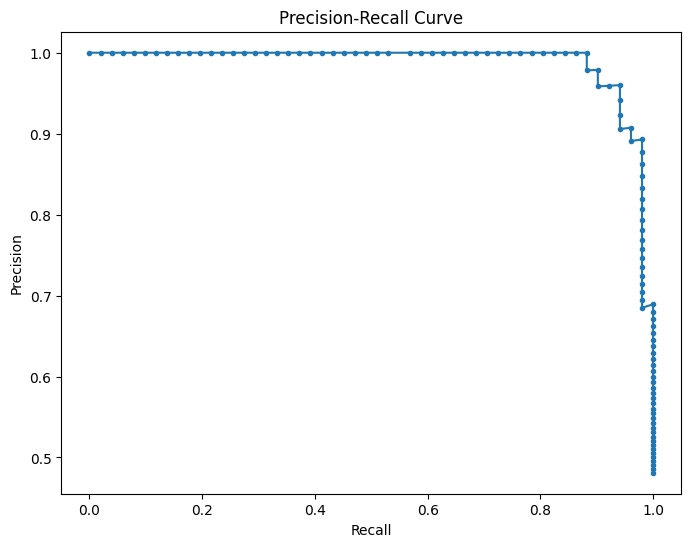

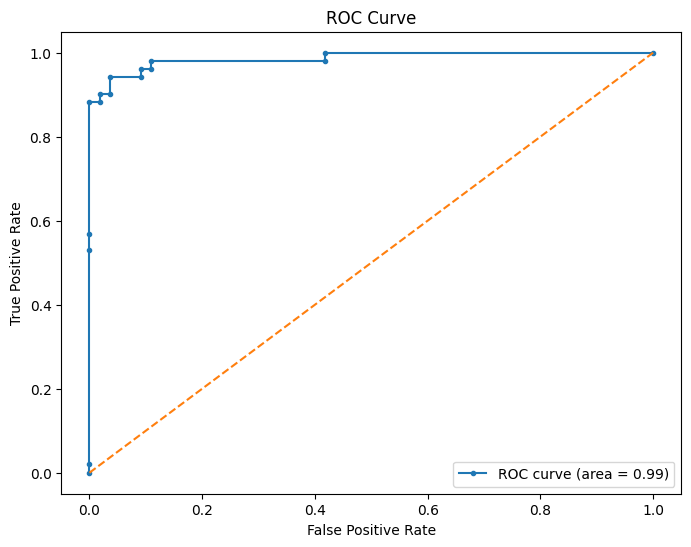

In [123]:
curve(log_model)

In [124]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144667 entries, 0 to 144666
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    144667 non-null  int64  
 1   V1      144667 non-null  float64
 2   V2      144667 non-null  float64
 3   V3      144667 non-null  float64
 4   V4      144667 non-null  float64
 5   V5      144667 non-null  float64
 6   V6      144667 non-null  float64
 7   V7      144667 non-null  float64
 8   V8      144667 non-null  float64
 9   V9      144667 non-null  float64
 10  V10     144667 non-null  float64
 11  V11     144667 non-null  float64
 12  V12     144667 non-null  float64
 13  V13     144667 non-null  float64
 14  V14     144667 non-null  float64
 15  V15     144667 non-null  float64
 16  V16     144667 non-null  float64
 17  V17     144667 non-null  float64
 18  V18     144667 non-null  float64
 19  V19     144667 non-null  float64
 20  V20     144667 non-null  float64
 21  V21     14

In [125]:
input_str = "0,-1.35981,-0.07278,2.53635,1.37816,-0.33832,0.46239,0.2396,0.0987,0.36379,0.09079,-0.5516,-0.6178,-0.99139,-0.31117,1.46818,-0.4704,0.20797,0.02579,0.040399,0.25141,-0.01831,0.27784,-0.11047,0.06693,0.12854,-0.18911,0.13356,-0.02105,149.62"
array = [float(element) for element in input_str.split(',')]

In [126]:
print("Array:", array)

Array: [0.0, -1.35981, -0.07278, 2.53635, 1.37816, -0.33832, 0.46239, 0.2396, 0.0987, 0.36379, 0.09079, -0.5516, -0.6178, -0.99139, -0.31117, 1.46818, -0.4704, 0.20797, 0.02579, 0.040399, 0.25141, -0.01831, 0.27784, -0.11047, 0.06693, 0.12854, -0.18911, 0.13356, -0.02105, 149.62]


In [127]:
df = pd.DataFrame([array])

df_np = np.array(df).reshape(1, -1)

new_input = scaler.transform(df_np)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [128]:
new_pred = log_model.predict(new_input)

In [129]:
new_pred[0]

0

In [130]:
class_labels = ['Genuine','Fraudulent']

In [131]:
predicted_labels = [class_labels[prediction] for prediction in new_pred]

In [132]:
print(predicted_labels)

['Genuine']
